In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from datetime import datetime
import xarray as xr
import netCDF4 as nc
import pandas as pd
import glob
import math
import subprocess
from matplotlib import colormaps
import plotly.graph_objs as go

import cartopy.crs as ccrs
import cartopy.feature as cfeature


/home/b/b382718/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:

ds_sip = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/light_param/SIP/20000619_21/steps_2mom_sip/NWP_LAM_icongrid_DOM04_200006*');
ds_nosip = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/light_param/SIP/20000619_21/steps_2mom_nosip/NWP_LAM_icongrid_DOM04_200006*');


In [ ]:

ds_4sip = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/light_param/SIP/20000619_21/all4sip/steps_2mom_sip/NWP_LAM_icongrid_DOM04_200006*');
ds_nohm = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/light_param/SIP/20000619_21/nohm/steps_2mom_sip/NWP_LAM_icongrid_DOM04_200006*');
ds_norf = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/light_param/SIP/20000619_21/norf/steps_2mom_sip/NWP_LAM_icongrid_DOM04_200006*');
ds_nobr = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/light_param/SIP/20000619_21/nobr/steps_2mom_sip/NWP_LAM_icongrid_DOM04_200006*');
ds_nosb = xr.open_mfdataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/light_param/SIP/20000619_21/nosb/steps_2mom_sip/NWP_LAM_icongrid_DOM04_200006*');


In [4]:

ds_sip['w_vel'] = -1.*ds_sip.omega/(9.8*ds_sip.rho)
ds_sip['tempc'] = ds_sip.temp-273.16;
ds_sip['lwc_gperm3']  = ds_sip.qc*ds_sip.rho*1.e3 # kgperm3 to gperm3
ds_sip['ciwc_gperm3'] = ds_sip.qi*ds_sip.rho*1.e3 # kgperm3 to gperm3
ds_sip['tiwc_gperm3'] = (ds_sip.qi+ds_sip.qs+ds_sip.qg+ds_sip.qh)*ds_sip.rho*1.e3 # kgperm3 to gperm3
ds_sip['cdnc_percm3'] = ds_sip.qnc*ds_sip.rho*1.e-6  # perkg to percm3
ds_sip['inc_perl'] = (ds_sip.qni+ds_sip.qns+ds_sip.qng+ds_sip.qnh)*ds_sip.rho*1.e-3 # perkg to perl
ds_sip['tqi'] = ds_sip.qi+ds_sip.qs+ds_sip.qg+ds_sip.qh

ds_nosip['w_vel'] = -1.*ds_nosip.omega/(9.8*ds_nosip.rho)
ds_nosip['tempc'] = ds_nosip.temp-273.16;
ds_nosip['lwc_gperm3']  = ds_nosip.qc*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['ciwc_gperm3'] = ds_nosip.qi*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tiwc_gperm3'] = (ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh)*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['cdnc_percm3'] = ds_nosip.qnc*ds_nosip.rho*1.e-6  # perkg to percm3
ds_nosip['inc_perl'] = (ds_nosip.qni+ds_nosip.qns+ds_nosip.qng+ds_nosip.qnh)*ds_nosip.rho*1.e-3 # perkg to perl
ds_nosip['tqi'] = ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh


In [5]:

ds_4sip['w_vel'] = -1.*ds_4sip.omega/(9.8*ds_4sip.rho)
ds_4sip['tempc'] = ds_4sip.temp-273.16;
ds_4sip['lwc_gperm3']  = ds_4sip.qc*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['ciwc_gperm3'] = ds_4sip.qi*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['tiwc_gperm3'] = (ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh)*ds_4sip.rho*1.e3 # kgperm3 to gperm3
ds_4sip['cdnc_percm3'] = ds_4sip.qnc*ds_4sip.rho*1.e-6  # perkg to percm3
ds_4sip['inc_perl'] = (ds_4sip.qni+ds_4sip.qns+ds_4sip.qng+ds_4sip.qnh)*ds_4sip.rho*1.e-3 # perkg to perl
ds_4sip['tqi'] = ds_4sip.qi+ds_4sip.qs+ds_4sip.qg+ds_4sip.qh

ds_nohm['w_vel'] = -1.*ds_nohm.omega/(9.8*ds_nohm.rho)
ds_nohm['tempc'] = ds_nohm.temp-273.16;
ds_nohm['lwc_gperm3']  = ds_nohm.qc*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['ciwc_gperm3'] = ds_nohm.qi*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['tiwc_gperm3'] = (ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh)*ds_nohm.rho*1.e3 # kgperm3 to gperm3
ds_nohm['cdnc_percm3'] = ds_nohm.qnc*ds_nohm.rho*1.e-6  # perkg to percm3
ds_nohm['inc_perl'] = (ds_nohm.qni+ds_nohm.qns+ds_nohm.qng+ds_nohm.qnh)*ds_nohm.rho*1.e-3 # perkg to perl
ds_nohm['tqi'] = ds_nohm.qi+ds_nohm.qs+ds_nohm.qg+ds_nohm.qh

ds_norf['w_vel'] = -1.*ds_norf.omega/(9.8*ds_norf.rho)
ds_norf['tempc'] = ds_norf.temp-273.16;
ds_norf['lwc_gperm3']  = ds_norf.qc*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['ciwc_gperm3'] = ds_norf.qi*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['tiwc_gperm3'] = (ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh)*ds_norf.rho*1.e3 # kgperm3 to gperm3
ds_norf['cdnc_percm3'] = ds_norf.qnc*ds_norf.rho*1.e-6  # perkg to percm3
ds_norf['inc_perl'] = (ds_norf.qni+ds_norf.qns+ds_norf.qng+ds_norf.qnh)*ds_norf.rho*1.e-3 # perkg to perl
ds_norf['tqi'] = ds_norf.qi+ds_norf.qs+ds_norf.qg+ds_norf.qh

ds_nobr['w_vel'] = -1.*ds_nobr.omega/(9.8*ds_nobr.rho)
ds_nobr['tempc'] = ds_nobr.temp-273.16;
ds_nobr['lwc_gperm3']  = ds_nobr.qc*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['ciwc_gperm3'] = ds_nobr.qi*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['tiwc_gperm3'] = (ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh)*ds_nobr.rho*1.e3 # kgperm3 to gperm3
ds_nobr['cdnc_percm3'] = ds_nobr.qnc*ds_nobr.rho*1.e-6  # perkg to percm3
ds_nobr['inc_perl'] = (ds_nobr.qni+ds_nobr.qns+ds_nobr.qng+ds_nobr.qnh)*ds_nobr.rho*1.e-3 # perkg to perl
ds_nobr['tqi'] = ds_nobr.qi+ds_nobr.qs+ds_nobr.qg+ds_nobr.qh

ds_nosb['w_vel'] = -1.*ds_nosb.omega/(9.8*ds_nosb.rho)
ds_nosb['tempc'] = ds_nosb.temp-273.16;
ds_nosb['lwc_gperm3']  = ds_nosb.qc*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['ciwc_gperm3'] = ds_nosb.qi*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['tiwc_gperm3'] = (ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh)*ds_nosb.rho*1.e3 # kgperm3 to gperm3
ds_nosb['cdnc_percm3'] = ds_nosb.qnc*ds_nosb.rho*1.e-6  # perkg to percm3
ds_nosb['inc_perl'] = (ds_nosb.qni+ds_nosb.qns+ds_nosb.qng+ds_nosb.qnh)*ds_nosb.rho*1.e-3 # perkg to perl
ds_nosb['tqi'] = ds_nosb.qi+ds_nosb.qs+ds_nosb.qg+ds_nosb.qh



In [6]:

#######
min_tempc_sip = ds_sip.tempc.min().values
max_tempc_sip = ds_sip.tempc.max().values

min_wvel_sip = ds_sip.w_vel.min().values
max_wvel_sip = ds_sip.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_bin = np.linspace(min_tempc_sip, max_tempc_sip, num_temp_bin+1)
wvel_bin = np.linspace(min_wvel_sip, max_wvel_sip, num_w_bin+1)
#######

#######
tempc_sip_flat = ds_sip.tempc.values.flatten()
wvel_sip_flat = ds_sip.w_vel.values.flatten()

qc_sip_flat = ds_sip.qc.values.flatten()
qi_sip_flat = ds_sip.qi.values.flatten()
qs_sip_flat = ds_sip.qs.values.flatten()
qg_sip_flat = ds_sip.qg.values.flatten()
qh_sip_flat = ds_sip.qh.values.flatten()
qr_sip_flat = ds_sip.qr.values.flatten()
tqi_sip_flat = ds_sip.tqi.values.flatten()
#######

hist_sip, temp_edges_sip, wvel_edges_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin))

#######
qc_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qc_sip_flat)[0]
qi_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qi_sip_flat)[0]
qs_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qs_sip_flat)[0]
qg_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qg_sip_flat)[0]
qh_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qh_sip_flat)[0]
qr_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qr_sip_flat)[0]
tqi_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = tqi_sip_flat)[0]
#######

#######
avg_qc_temp_w_sip = qc_sum_sip/hist_sip
avg_qc_temp_w_sip[avg_qc_temp_w_sip < 1.e-9] = np.nan

avg_qi_temp_w_sip = qi_sum_sip/hist_sip
avg_qi_temp_w_sip[avg_qi_temp_w_sip < 1.e-9] = np.nan

avg_qs_temp_w_sip = qs_sum_sip/hist_sip
avg_qs_temp_w_sip[avg_qs_temp_w_sip < 1.e-9] = np.nan

avg_qg_temp_w_sip = qg_sum_sip/hist_sip
avg_qg_temp_w_sip[avg_qg_temp_w_sip < 1.e-9] = np.nan

avg_qh_temp_w_sip = qh_sum_sip/hist_sip
avg_qh_temp_w_sip[avg_qh_temp_w_sip < 1.e-9] = np.nan

avg_qr_temp_w_sip = qr_sum_sip/hist_sip
avg_qr_temp_w_sip[avg_qr_temp_w_sip < 1.e-9] = np.nan

avg_tqi_temp_w_sip = tqi_sum_sip/hist_sip
avg_tqi_temp_w_sip[avg_tqi_temp_w_sip < 1.e-9] = np.nan
#######


/tmp/ipykernel_907014/3716124162.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_sip = qc_sum_sip/hist_sip
/tmp/ipykernel_907014/3716124162.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_sip = qi_sum_sip/hist_sip
/tmp/ipykernel_907014/3716124162.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_sip = qs_sum_sip/hist_sip
/tmp/ipykernel_907014/3716124162.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_sip = qg_sum_sip/hist_sip
/tmp/ipykernel_907014/3716124162.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_sip = qh_sum_sip/hist_sip
/tmp/ipykernel_907014/3716124162.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_sip = qr_sum_sip/hist_sip
/tmp/ipykernel_907014/3716124162.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_sip = tqi_sum_sip/hist_sip


In [7]:

#######
min_tempc_nohm = ds_nohm.tempc.min().values
max_tempc_nohm = ds_nohm.tempc.max().values

min_wvel_nohm = ds_nohm.w_vel.min().values
max_wvel_nohm = ds_nohm.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_bin = np.linspace(min_tempc_nohm, max_tempc_nohm, num_temp_bin+1)
wvel_bin = np.linspace(min_wvel_nohm, max_wvel_nohm, num_w_bin+1)
#######

#######
tempc_nohm_flat = ds_nohm.tempc.values.flatten()
wvel_nohm_flat = ds_nohm.w_vel.values.flatten()

qc_nohm_flat = ds_nohm.qc.values.flatten()
qi_nohm_flat = ds_nohm.qi.values.flatten()
qs_nohm_flat = ds_nohm.qs.values.flatten()
qg_nohm_flat = ds_nohm.qg.values.flatten()
qh_nohm_flat = ds_nohm.qh.values.flatten()
qr_nohm_flat = ds_nohm.qr.values.flatten()
tqi_nohm_flat = ds_nohm.tqi.values.flatten()
#######

hist_nohm, temp_edges_nohm, wvel_edges_nohm = np.histogram2d(tempc_nohm_flat, wvel_nohm_flat, bins=(temp_bin, wvel_bin))

#######
qc_sum_nohm = np.histogram2d(tempc_nohm_flat, wvel_nohm_flat, bins=(temp_bin, wvel_bin), weights = qc_nohm_flat)[0]
qi_sum_nohm = np.histogram2d(tempc_nohm_flat, wvel_nohm_flat, bins=(temp_bin, wvel_bin), weights = qi_nohm_flat)[0]
qs_sum_nohm = np.histogram2d(tempc_nohm_flat, wvel_nohm_flat, bins=(temp_bin, wvel_bin), weights = qs_nohm_flat)[0]
qg_sum_nohm = np.histogram2d(tempc_nohm_flat, wvel_nohm_flat, bins=(temp_bin, wvel_bin), weights = qg_nohm_flat)[0]
qh_sum_nohm = np.histogram2d(tempc_nohm_flat, wvel_nohm_flat, bins=(temp_bin, wvel_bin), weights = qh_nohm_flat)[0]
qr_sum_nohm = np.histogram2d(tempc_nohm_flat, wvel_nohm_flat, bins=(temp_bin, wvel_bin), weights = qr_nohm_flat)[0]
tqi_sum_nohm = np.histogram2d(tempc_nohm_flat, wvel_nohm_flat, bins=(temp_bin, wvel_bin), weights = tqi_nohm_flat)[0]
#######

#######
avg_qc_temp_w_nohm = qc_sum_nohm/hist_nohm
avg_qc_temp_w_nohm[avg_qc_temp_w_nohm < 1.e-9] = np.nan

avg_qi_temp_w_nohm = qi_sum_nohm/hist_nohm
avg_qi_temp_w_nohm[avg_qi_temp_w_nohm < 1.e-9] = np.nan

avg_qs_temp_w_nohm = qs_sum_nohm/hist_nohm
avg_qs_temp_w_nohm[avg_qs_temp_w_nohm < 1.e-9] = np.nan

avg_qg_temp_w_nohm = qg_sum_nohm/hist_nohm
avg_qg_temp_w_nohm[avg_qg_temp_w_nohm < 1.e-9] = np.nan

avg_qh_temp_w_nohm = qh_sum_nohm/hist_nohm
avg_qh_temp_w_nohm[avg_qh_temp_w_nohm < 1.e-9] = np.nan

avg_qr_temp_w_nohm = qr_sum_nohm/hist_nohm
avg_qr_temp_w_nohm[avg_qr_temp_w_nohm < 1.e-9] = np.nan

avg_tqi_temp_w_nohm = tqi_sum_nohm/hist_nohm
avg_tqi_temp_w_nohm[avg_tqi_temp_w_nohm < 1.e-9] = np.nan
#######


/tmp/ipykernel_907014/163542202.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_nohm = qc_sum_nohm/hist_nohm
/tmp/ipykernel_907014/163542202.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_nohm = qi_sum_nohm/hist_nohm
/tmp/ipykernel_907014/163542202.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_nohm = qs_sum_nohm/hist_nohm
/tmp/ipykernel_907014/163542202.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_nohm = qg_sum_nohm/hist_nohm
/tmp/ipykernel_907014/163542202.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_nohm = qh_sum_nohm/hist_nohm
/tmp/ipykernel_907014/163542202.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_nohm = qr_sum_nohm/hist_nohm
/tmp/ipykernel_907014/163542202.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_nohm = tqi_sum_nohm/hist_nohm


In [8]:

#######
min_tempc_norf = ds_norf.tempc.min().values
max_tempc_norf = ds_norf.tempc.max().values

min_wvel_norf = ds_norf.w_vel.min().values
max_wvel_norf = ds_norf.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_bin = np.linspace(min_tempc_norf, max_tempc_norf, num_temp_bin+1)
wvel_bin = np.linspace(min_wvel_norf, max_wvel_norf, num_w_bin+1)
#######

#######
tempc_norf_flat = ds_norf.tempc.values.flatten()
wvel_norf_flat = ds_norf.w_vel.values.flatten()

qc_norf_flat = ds_norf.qc.values.flatten()
qi_norf_flat = ds_norf.qi.values.flatten()
qs_norf_flat = ds_norf.qs.values.flatten()
qg_norf_flat = ds_norf.qg.values.flatten()
qh_norf_flat = ds_norf.qh.values.flatten()
qr_norf_flat = ds_norf.qr.values.flatten()
tqi_norf_flat = ds_norf.tqi.values.flatten()
#######

hist_norf, temp_edges_norf, wvel_edges_norf = np.histogram2d(tempc_norf_flat, wvel_norf_flat, bins=(temp_bin, wvel_bin))

#######
qc_sum_norf = np.histogram2d(tempc_norf_flat, wvel_norf_flat, bins=(temp_bin, wvel_bin), weights = qc_norf_flat)[0]
qi_sum_norf = np.histogram2d(tempc_norf_flat, wvel_norf_flat, bins=(temp_bin, wvel_bin), weights = qi_norf_flat)[0]
qs_sum_norf = np.histogram2d(tempc_norf_flat, wvel_norf_flat, bins=(temp_bin, wvel_bin), weights = qs_norf_flat)[0]
qg_sum_norf = np.histogram2d(tempc_norf_flat, wvel_norf_flat, bins=(temp_bin, wvel_bin), weights = qg_norf_flat)[0]
qh_sum_norf = np.histogram2d(tempc_norf_flat, wvel_norf_flat, bins=(temp_bin, wvel_bin), weights = qh_norf_flat)[0]
qr_sum_norf = np.histogram2d(tempc_norf_flat, wvel_norf_flat, bins=(temp_bin, wvel_bin), weights = qr_norf_flat)[0]
tqi_sum_norf = np.histogram2d(tempc_norf_flat, wvel_norf_flat, bins=(temp_bin, wvel_bin), weights = tqi_norf_flat)[0]
#######

#######
avg_qc_temp_w_norf = qc_sum_norf/hist_norf
avg_qc_temp_w_norf[avg_qc_temp_w_norf < 1.e-9] = np.nan

avg_qi_temp_w_norf = qi_sum_norf/hist_norf
avg_qi_temp_w_norf[avg_qi_temp_w_norf < 1.e-9] = np.nan

avg_qs_temp_w_norf = qs_sum_norf/hist_norf
avg_qs_temp_w_norf[avg_qs_temp_w_norf < 1.e-9] = np.nan

avg_qg_temp_w_norf = qg_sum_norf/hist_norf
avg_qg_temp_w_norf[avg_qg_temp_w_norf < 1.e-9] = np.nan

avg_qh_temp_w_norf = qh_sum_norf/hist_norf
avg_qh_temp_w_norf[avg_qh_temp_w_norf < 1.e-9] = np.nan

avg_qr_temp_w_norf = qr_sum_norf/hist_norf
avg_qr_temp_w_norf[avg_qr_temp_w_norf < 1.e-9] = np.nan

avg_tqi_temp_w_norf = tqi_sum_norf/hist_norf
avg_tqi_temp_w_norf[avg_tqi_temp_w_norf < 1.e-9] = np.nan
#######


/tmp/ipykernel_907014/2559005175.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_norf = qc_sum_norf/hist_norf
/tmp/ipykernel_907014/2559005175.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_norf = qi_sum_norf/hist_norf
/tmp/ipykernel_907014/2559005175.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_norf = qs_sum_norf/hist_norf
/tmp/ipykernel_907014/2559005175.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_norf = qg_sum_norf/hist_norf
/tmp/ipykernel_907014/2559005175.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_norf = qh_sum_norf/hist_norf
/tmp/ipykernel_907014/2559005175.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_norf = qr_sum_norf/hist_norf
/tmp/ipykernel_907014/2559005175.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_norf = tqi_sum_norf/hist_norf


In [9]:

#######
min_tempc_nobr = ds_nobr.tempc.min().values
max_tempc_nobr = ds_nobr.tempc.max().values

min_wvel_nobr = ds_nobr.w_vel.min().values
max_wvel_nobr = ds_nobr.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_bin = np.linspace(min_tempc_nobr, max_tempc_nobr, num_temp_bin+1)
wvel_bin = np.linspace(min_wvel_nobr, max_wvel_nobr, num_w_bin+1)
#######

#######
tempc_nobr_flat = ds_nobr.tempc.values.flatten()
wvel_nobr_flat = ds_nobr.w_vel.values.flatten()

qc_nobr_flat = ds_nobr.qc.values.flatten()
qi_nobr_flat = ds_nobr.qi.values.flatten()
qs_nobr_flat = ds_nobr.qs.values.flatten()
qg_nobr_flat = ds_nobr.qg.values.flatten()
qh_nobr_flat = ds_nobr.qh.values.flatten()
qr_nobr_flat = ds_nobr.qr.values.flatten()
tqi_nobr_flat = ds_nobr.tqi.values.flatten()
#######

hist_nobr, temp_edges_nobr, wvel_edges_nobr = np.histogram2d(tempc_nobr_flat, wvel_nobr_flat, bins=(temp_bin, wvel_bin))

#######
qc_sum_nobr = np.histogram2d(tempc_nobr_flat, wvel_nobr_flat, bins=(temp_bin, wvel_bin), weights = qc_nobr_flat)[0]
qi_sum_nobr = np.histogram2d(tempc_nobr_flat, wvel_nobr_flat, bins=(temp_bin, wvel_bin), weights = qi_nobr_flat)[0]
qs_sum_nobr = np.histogram2d(tempc_nobr_flat, wvel_nobr_flat, bins=(temp_bin, wvel_bin), weights = qs_nobr_flat)[0]
qg_sum_nobr = np.histogram2d(tempc_nobr_flat, wvel_nobr_flat, bins=(temp_bin, wvel_bin), weights = qg_nobr_flat)[0]
qh_sum_nobr = np.histogram2d(tempc_nobr_flat, wvel_nobr_flat, bins=(temp_bin, wvel_bin), weights = qh_nobr_flat)[0]
qr_sum_nobr = np.histogram2d(tempc_nobr_flat, wvel_nobr_flat, bins=(temp_bin, wvel_bin), weights = qr_nobr_flat)[0]
tqi_sum_nobr = np.histogram2d(tempc_nobr_flat, wvel_nobr_flat, bins=(temp_bin, wvel_bin), weights = tqi_nobr_flat)[0]
#######

#######
avg_qc_temp_w_nobr = qc_sum_nobr/hist_nobr
avg_qc_temp_w_nobr[avg_qc_temp_w_nobr < 1.e-9] = np.nan

avg_qi_temp_w_nobr = qi_sum_nobr/hist_nobr
avg_qi_temp_w_nobr[avg_qi_temp_w_nobr < 1.e-9] = np.nan

avg_qs_temp_w_nobr = qs_sum_nobr/hist_nobr
avg_qs_temp_w_nobr[avg_qs_temp_w_nobr < 1.e-9] = np.nan

avg_qg_temp_w_nobr = qg_sum_nobr/hist_nobr
avg_qg_temp_w_nobr[avg_qg_temp_w_nobr < 1.e-9] = np.nan

avg_qh_temp_w_nobr = qh_sum_norf/hist_nobr
avg_qh_temp_w_nobr[avg_qh_temp_w_nobr < 1.e-9] = np.nan

avg_qr_temp_w_nobr = qr_sum_nobr/hist_nobr
avg_qr_temp_w_nobr[avg_qr_temp_w_nobr < 1.e-9] = np.nan

avg_tqi_temp_w_nobr = tqi_sum_nobr/hist_nobr
avg_tqi_temp_w_nobr[avg_tqi_temp_w_nobr < 1.e-9] = np.nan
#######


/tmp/ipykernel_907014/3265781641.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_nobr = qc_sum_nobr/hist_nobr
/tmp/ipykernel_907014/3265781641.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_nobr = qi_sum_nobr/hist_nobr
/tmp/ipykernel_907014/3265781641.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_nobr = qs_sum_nobr/hist_nobr
/tmp/ipykernel_907014/3265781641.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_nobr = qg_sum_nobr/hist_nobr
/tmp/ipykernel_907014/3265781641.py:52: RuntimeWarning: divide by zero encountered in divide
  avg_qh_temp_w_nobr = qh_sum_norf/hist_nobr
/tmp/ipykernel_907014/3265781641.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_nobr = qh_sum_norf/hist_nobr
/tmp/ipykernel_907014/3265781641.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_nobr = qr_sum_nobr/hist_nobr
/tmp/ipykernel_907014/3265781641.py:58: 

In [10]:

#######
min_tempc_nosb = ds_nosb.tempc.min().values
max_tempc_nosb = ds_nosb.tempc.max().values

min_wvel_nosb = ds_nosb.w_vel.min().values
max_wvel_nosb = ds_nosb.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_bin = np.linspace(min_tempc_nosb, max_tempc_nosb, num_temp_bin+1)
wvel_bin = np.linspace(min_wvel_nosb, max_wvel_nosb, num_w_bin+1)
#######

#######
tempc_nosb_flat = ds_nosb.tempc.values.flatten()
wvel_nosb_flat = ds_nosb.w_vel.values.flatten()

qc_nosb_flat = ds_nosb.qc.values.flatten()
qi_nosb_flat = ds_nosb.qi.values.flatten()
qs_nosb_flat = ds_nosb.qs.values.flatten()
qg_nosb_flat = ds_nosb.qg.values.flatten()
qh_nosb_flat = ds_nosb.qh.values.flatten()
qr_nosb_flat = ds_nosb.qr.values.flatten()
tqi_nosb_flat = ds_nosb.tqi.values.flatten()
#######

hist_nosb, temp_edges_nosb, wvel_edges_nosb = np.histogram2d(tempc_nosb_flat, wvel_nosb_flat, bins=(temp_bin, wvel_bin))

#######
qc_sum_nosb = np.histogram2d(tempc_nosb_flat, wvel_nosb_flat, bins=(temp_bin, wvel_bin), weights = qc_nosb_flat)[0]
qi_sum_nosb = np.histogram2d(tempc_nosb_flat, wvel_nosb_flat, bins=(temp_bin, wvel_bin), weights = qi_nosb_flat)[0]
qs_sum_nosb = np.histogram2d(tempc_nosb_flat, wvel_nosb_flat, bins=(temp_bin, wvel_bin), weights = qs_nosb_flat)[0]
qg_sum_nosb = np.histogram2d(tempc_nosb_flat, wvel_nosb_flat, bins=(temp_bin, wvel_bin), weights = qg_nosb_flat)[0]
qh_sum_nosb = np.histogram2d(tempc_nosb_flat, wvel_nosb_flat, bins=(temp_bin, wvel_bin), weights = qh_nosb_flat)[0]
qr_sum_nosb = np.histogram2d(tempc_nosb_flat, wvel_nosb_flat, bins=(temp_bin, wvel_bin), weights = qr_nosb_flat)[0]
tqi_sum_nosb = np.histogram2d(tempc_nosb_flat, wvel_nosb_flat, bins=(temp_bin, wvel_bin), weights = tqi_nosb_flat)[0]
#######

#######
avg_qc_temp_w_nosb = qc_sum_nosb/hist_nosb
avg_qc_temp_w_nosb[avg_qc_temp_w_nosb < 1.e-9] = np.nan

avg_qi_temp_w_nosb = qi_sum_nosb/hist_nosb
avg_qi_temp_w_nosb[avg_qi_temp_w_nosb < 1.e-9] = np.nan

avg_qs_temp_w_nosb = qs_sum_nosb/hist_nosb
avg_qs_temp_w_nosb[avg_qs_temp_w_nosb < 1.e-9] = np.nan

avg_qg_temp_w_nosb = qg_sum_nosb/hist_nosb
avg_qg_temp_w_nosb[avg_qg_temp_w_nosb < 1.e-9] = np.nan

avg_qh_temp_w_nosb = qh_sum_nosb/hist_nosb
avg_qh_temp_w_nosb[avg_qh_temp_w_nosb < 1.e-9] = np.nan

avg_qr_temp_w_nosb = qr_sum_nosb/hist_nosb
avg_qr_temp_w_nosb[avg_qr_temp_w_nosb < 1.e-9] = np.nan

avg_tqi_temp_w_nosb = tqi_sum_nosb/hist_nosb
avg_tqi_temp_w_nosb[avg_tqi_temp_w_nosb < 1.e-9] = np.nan
#######


/tmp/ipykernel_907014/1788352664.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_nosb = qc_sum_nosb/hist_nosb
/tmp/ipykernel_907014/1788352664.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_nosb = qi_sum_nosb/hist_nosb
/tmp/ipykernel_907014/1788352664.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_nosb = qs_sum_nosb/hist_nosb
/tmp/ipykernel_907014/1788352664.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_nosb = qg_sum_nosb/hist_nosb
/tmp/ipykernel_907014/1788352664.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_nosb = qh_sum_nosb/hist_nosb
/tmp/ipykernel_907014/1788352664.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_nosb = qr_sum_nosb/hist_nosb
/tmp/ipykernel_907014/1788352664.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_nosb = tqi_sum_nosb/hist_nosb


In [28]:

#######
min_tempc_4sip = ds_4sip.tempc.min().values
max_tempc_4sip = ds_4sip.tempc.max().values

min_wvel_4sip = ds_4sip.w_vel.min().values
max_wvel_4sip = ds_4sip.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_bin = np.linspace(min_tempc_4sip, max_tempc_4sip, num_temp_bin+1)
wvel_bin = np.linspace(min_wvel_4sip, max_wvel_4sip, num_w_bin+1)
#######

#######
tempc_4sip_flat = ds_4sip.tempc.values.flatten()
wvel_4sip_flat = ds_4sip.w_vel.values.flatten()

qc_4sip_flat = ds_4sip.qc.values.flatten()
qi_4sip_flat = ds_4sip.qi.values.flatten()
qs_4sip_flat = ds_4sip.qs.values.flatten()
qg_4sip_flat = ds_4sip.qg.values.flatten()
qh_4sip_flat = ds_4sip.qh.values.flatten()
qr_4sip_flat = ds_4sip.qr.values.flatten()
tqi_4sip_flat = ds_4sip.tqi.values.flatten()
#######

hist_4sip, temp_edges_4sip, wvel_edges_4sip = np.histogram2d(tempc_4sip_flat, wvel_4sip_flat, bins=(temp_bin, wvel_bin))

#######
qc_sum_4sip = np.histogram2d(tempc_4sip_flat, wvel_4sip_flat, bins=(temp_bin, wvel_bin), weights = qc_4sip_flat)[0]
qi_sum_4sip = np.histogram2d(tempc_4sip_flat, wvel_4sip_flat, bins=(temp_bin, wvel_bin), weights = qi_4sip_flat)[0]
qs_sum_4sip = np.histogram2d(tempc_4sip_flat, wvel_4sip_flat, bins=(temp_bin, wvel_bin), weights = qs_4sip_flat)[0]
qg_sum_4sip = np.histogram2d(tempc_4sip_flat, wvel_4sip_flat, bins=(temp_bin, wvel_bin), weights = qg_4sip_flat)[0]
qh_sum_4sip = np.histogram2d(tempc_4sip_flat, wvel_4sip_flat, bins=(temp_bin, wvel_bin), weights = qh_4sip_flat)[0]
qr_sum_4sip = np.histogram2d(tempc_4sip_flat, wvel_4sip_flat, bins=(temp_bin, wvel_bin), weights = qr_4sip_flat)[0]
tqi_sum_4sip = np.histogram2d(tempc_4sip_flat, wvel_4sip_flat, bins=(temp_bin, wvel_bin), weights = tqi_4sip_flat)[0]
#######

#######
avg_qc_temp_w_4sip = qc_sum_4sip/hist_4sip
avg_qc_temp_w_4sip[avg_qc_temp_w_4sip < 1.e-9] = np.nan

avg_qi_temp_w_4sip = qi_sum_4sip/hist_4sip
avg_qi_temp_w_4sip[avg_qi_temp_w_4sip < 1.e-9] = np.nan

avg_qs_temp_w_4sip = qs_sum_4sip/hist_4sip
avg_qs_temp_w_4sip[avg_qs_temp_w_4sip < 1.e-9] = np.nan

avg_qg_temp_w_4sip = qg_sum_4sip/hist_4sip
avg_qg_temp_w_4sip[avg_qg_temp_w_4sip < 1.e-9] = np.nan

avg_qh_temp_w_4sip = qh_sum_4sip/hist_4sip
avg_qh_temp_w_4sip[avg_qh_temp_w_4sip < 1.e-9] = np.nan

avg_qr_temp_w_4sip = qr_sum_4sip/hist_4sip
avg_qr_temp_w_4sip[avg_qr_temp_w_4sip < 1.e-9] = np.nan

avg_tqi_temp_w_4sip = tqi_sum_4sip/hist_4sip
avg_tqi_temp_w_4sip[avg_tqi_temp_w_4sip < 1.e-9] = np.nan
#######


/tmp/ipykernel_907014/2821278305.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_4sip = qc_sum_4sip/hist_4sip
/tmp/ipykernel_907014/2821278305.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_4sip = qi_sum_4sip/hist_4sip
/tmp/ipykernel_907014/2821278305.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_4sip = qs_sum_4sip/hist_4sip
/tmp/ipykernel_907014/2821278305.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_4sip = qg_sum_4sip/hist_4sip
/tmp/ipykernel_907014/2821278305.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_4sip = qh_sum_4sip/hist_4sip
/tmp/ipykernel_907014/2821278305.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_4sip = qr_sum_4sip/hist_4sip
/tmp/ipykernel_907014/2821278305.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_4sip = tqi_sum_4sip/hist_4sip


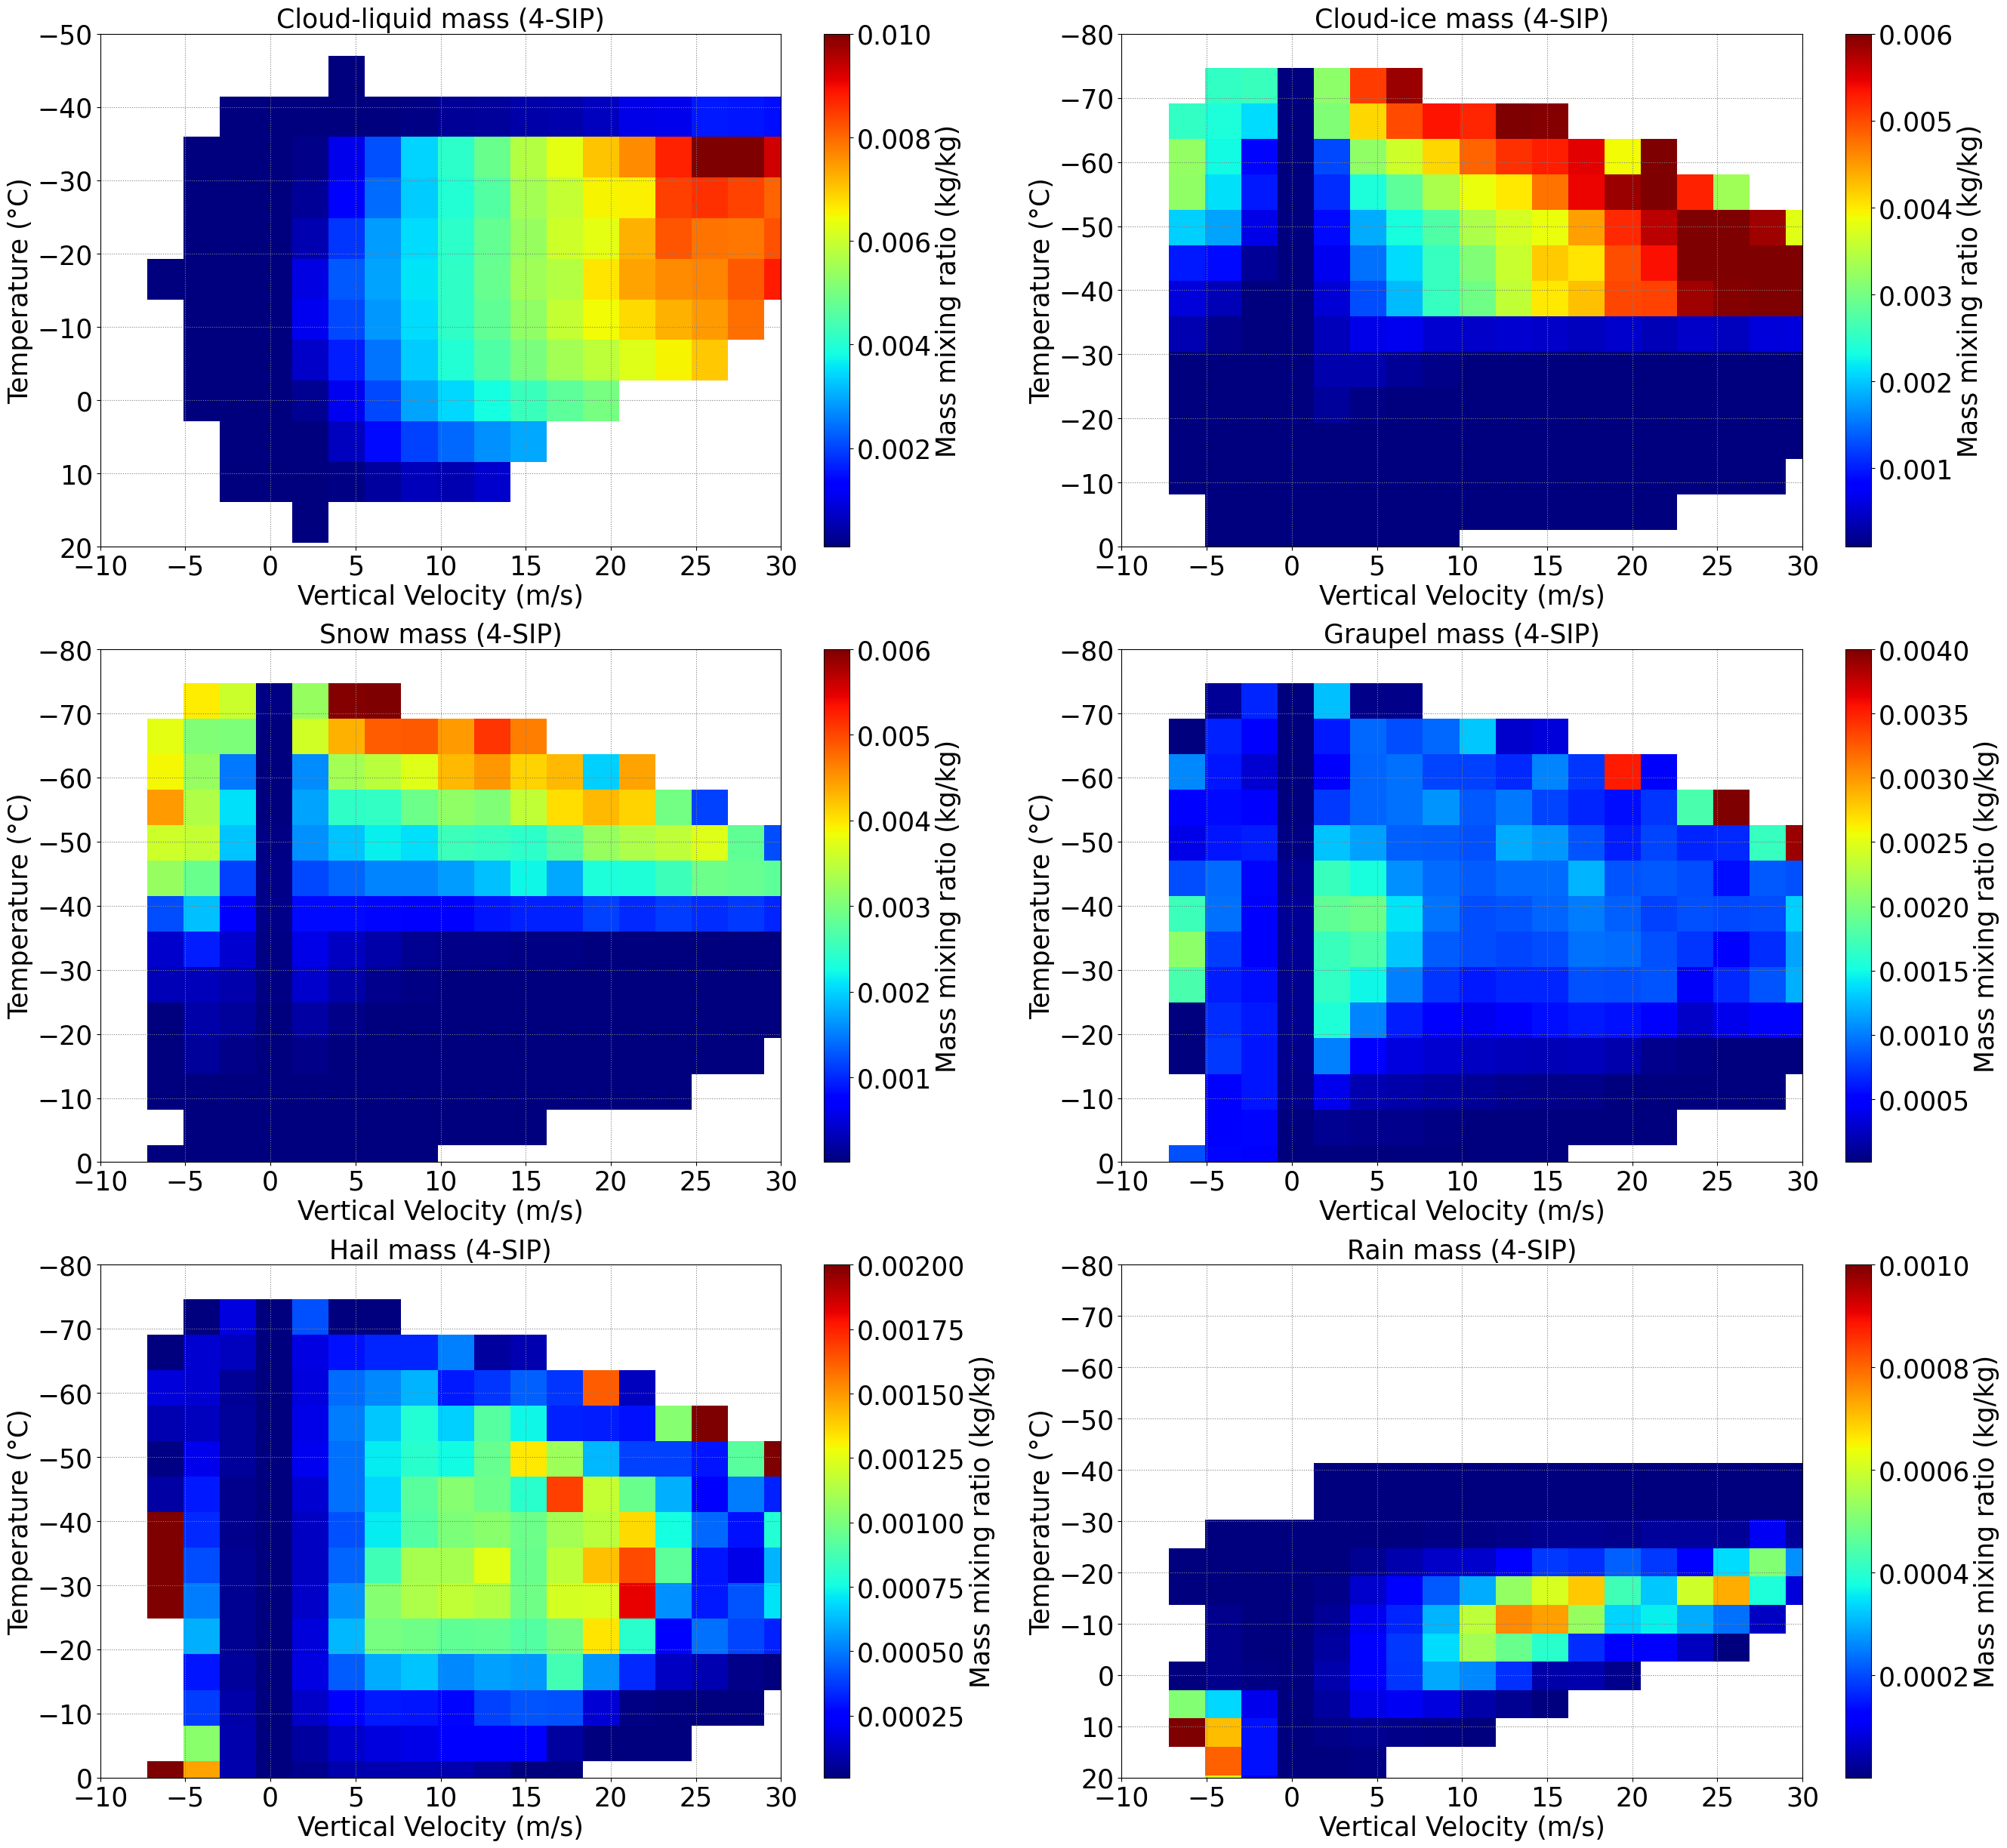

In [29]:


fontsize = 25;

plt.figure(figsize=(32, 30))
plt.subplot(3,2,1)
contour=plt.imshow(avg_qc_temp_w_4sip, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=1.e-2, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-liquid mass (4-SIP)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(avg_qi_temp_w_4sip, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-ice mass (4-SIP)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(avg_qs_temp_w_4sip, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Snow mass (4-SIP)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(avg_qg_temp_w_4sip, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=4.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Graupel mass (4-SIP)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(avg_qh_temp_w_4sip, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=2.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Hail mass (4-SIP)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(avg_qr_temp_w_4sip, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-6, vmax=1.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Rain mass (4-SIP)', fontsize=fontsize)

plt.show()


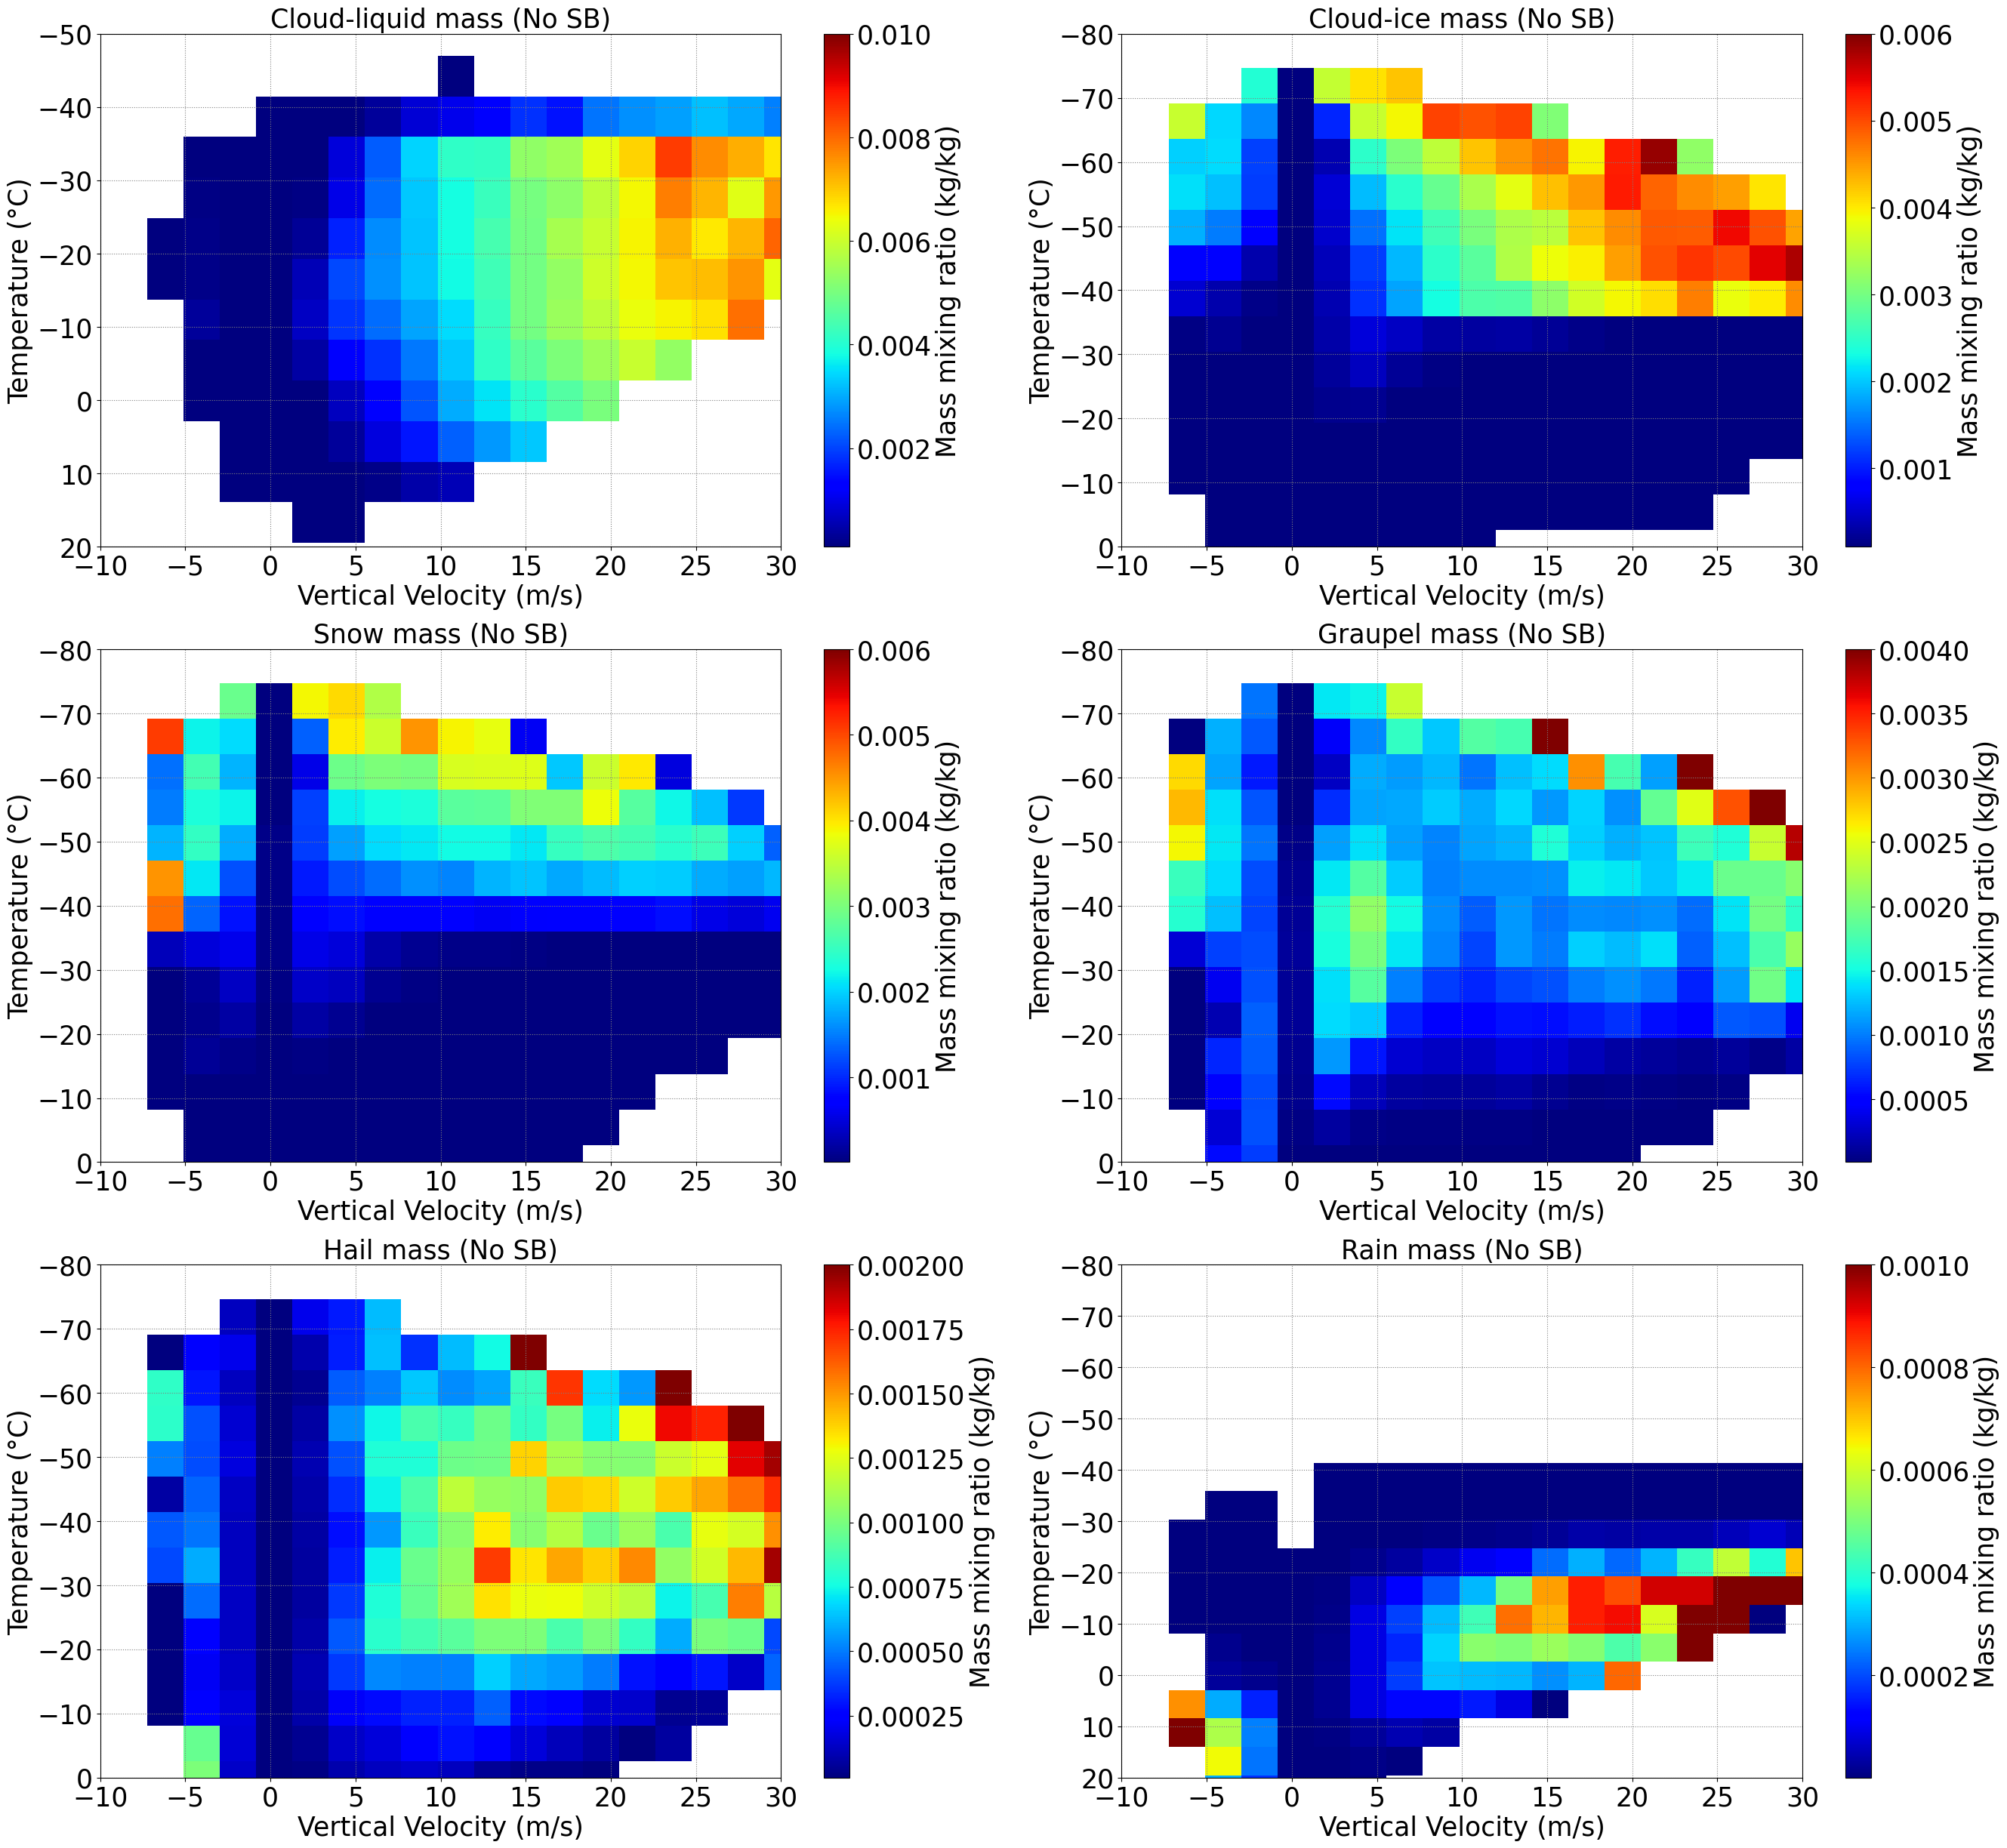

In [18]:


fontsize = 25;

plt.figure(figsize=(32, 30))
plt.subplot(3,2,1)
contour=plt.imshow(avg_qc_temp_w_nosb, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=1.e-2, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-liquid mass (No SB)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(avg_qi_temp_w_nosb, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-ice mass (No SB)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(avg_qs_temp_w_nosb, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Snow mass (No SB)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(avg_qg_temp_w_nosb, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=4.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Graupel mass (No SB)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(avg_qh_temp_w_nosb, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=2.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Hail mass (No SB)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(avg_qr_temp_w_nosb, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-6, vmax=1.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Rain mass (No SB)', fontsize=fontsize)

plt.show()


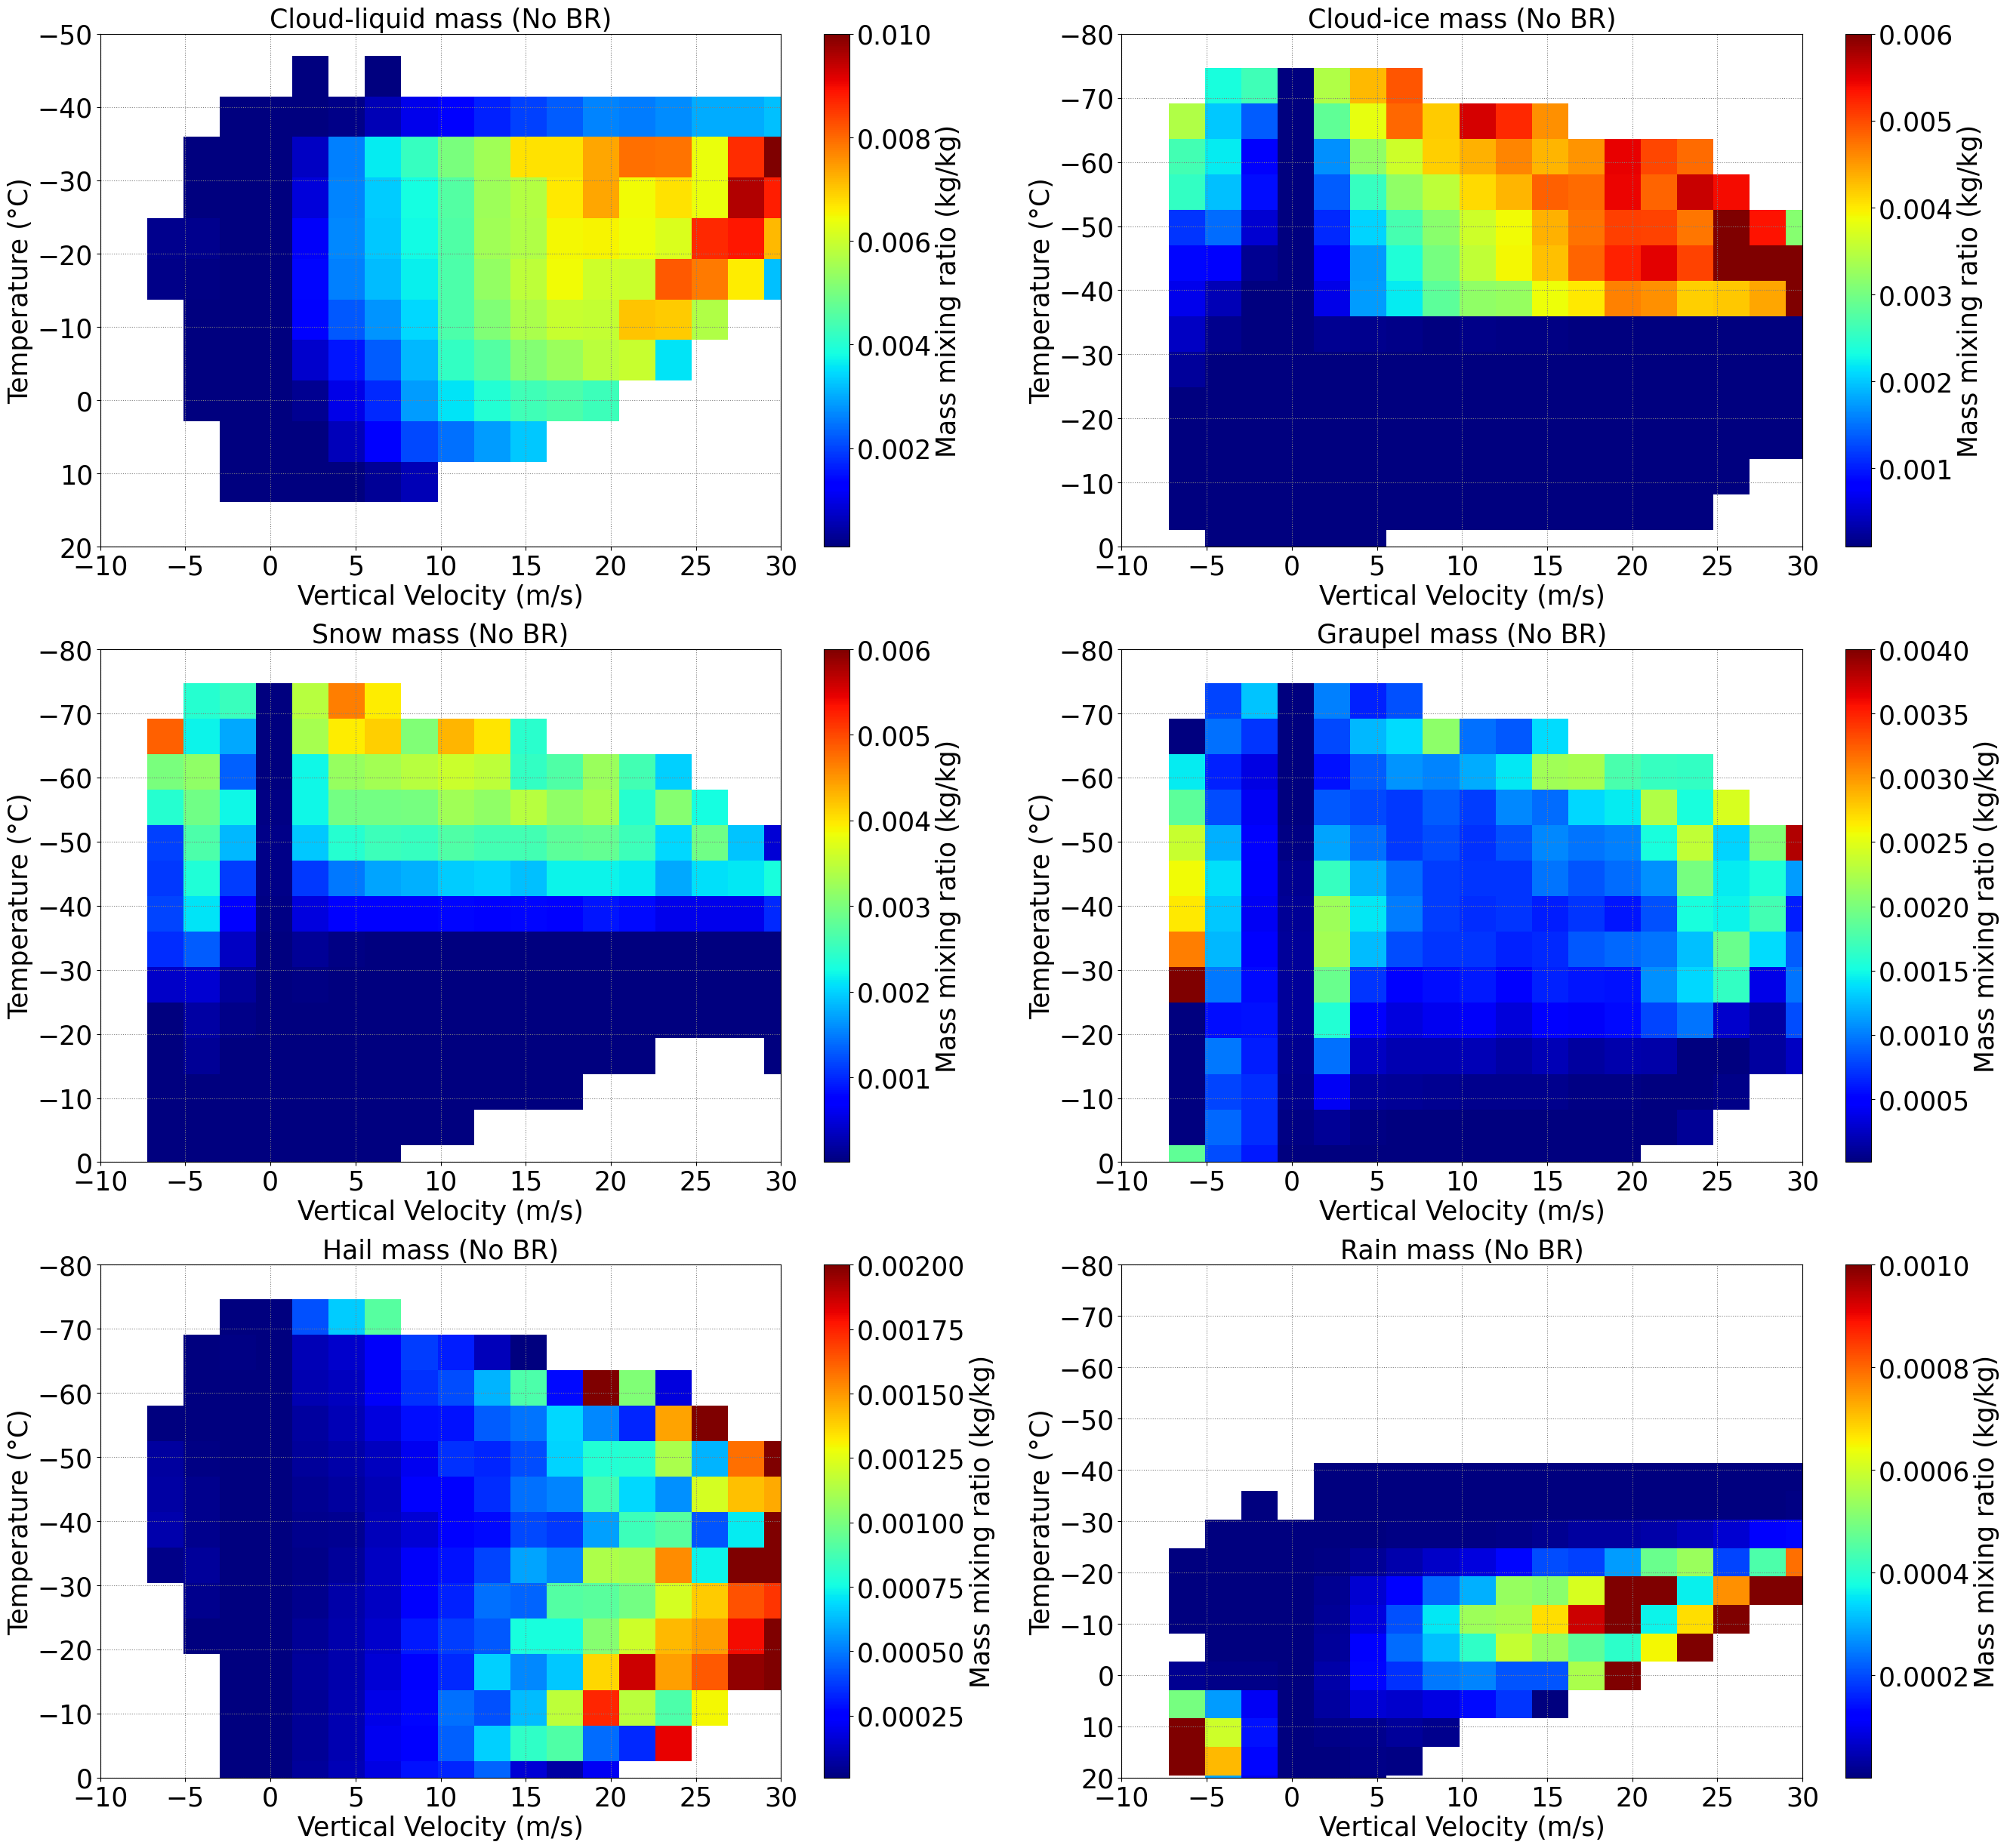

In [19]:


fontsize = 25;

plt.figure(figsize=(32, 30))
plt.subplot(3,2,1)
contour=plt.imshow(avg_qc_temp_w_nobr, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=1.e-2, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-liquid mass (No BR)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(avg_qi_temp_w_nobr, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-ice mass (No BR)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(avg_qs_temp_w_nobr, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Snow mass (No BR)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(avg_qg_temp_w_nobr, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=4.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Graupel mass (No BR)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(avg_qh_temp_w_nobr, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=2.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Hail mass (No BR)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(avg_qr_temp_w_nobr, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-6, vmax=1.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Rain mass (No BR)', fontsize=fontsize)

plt.show()


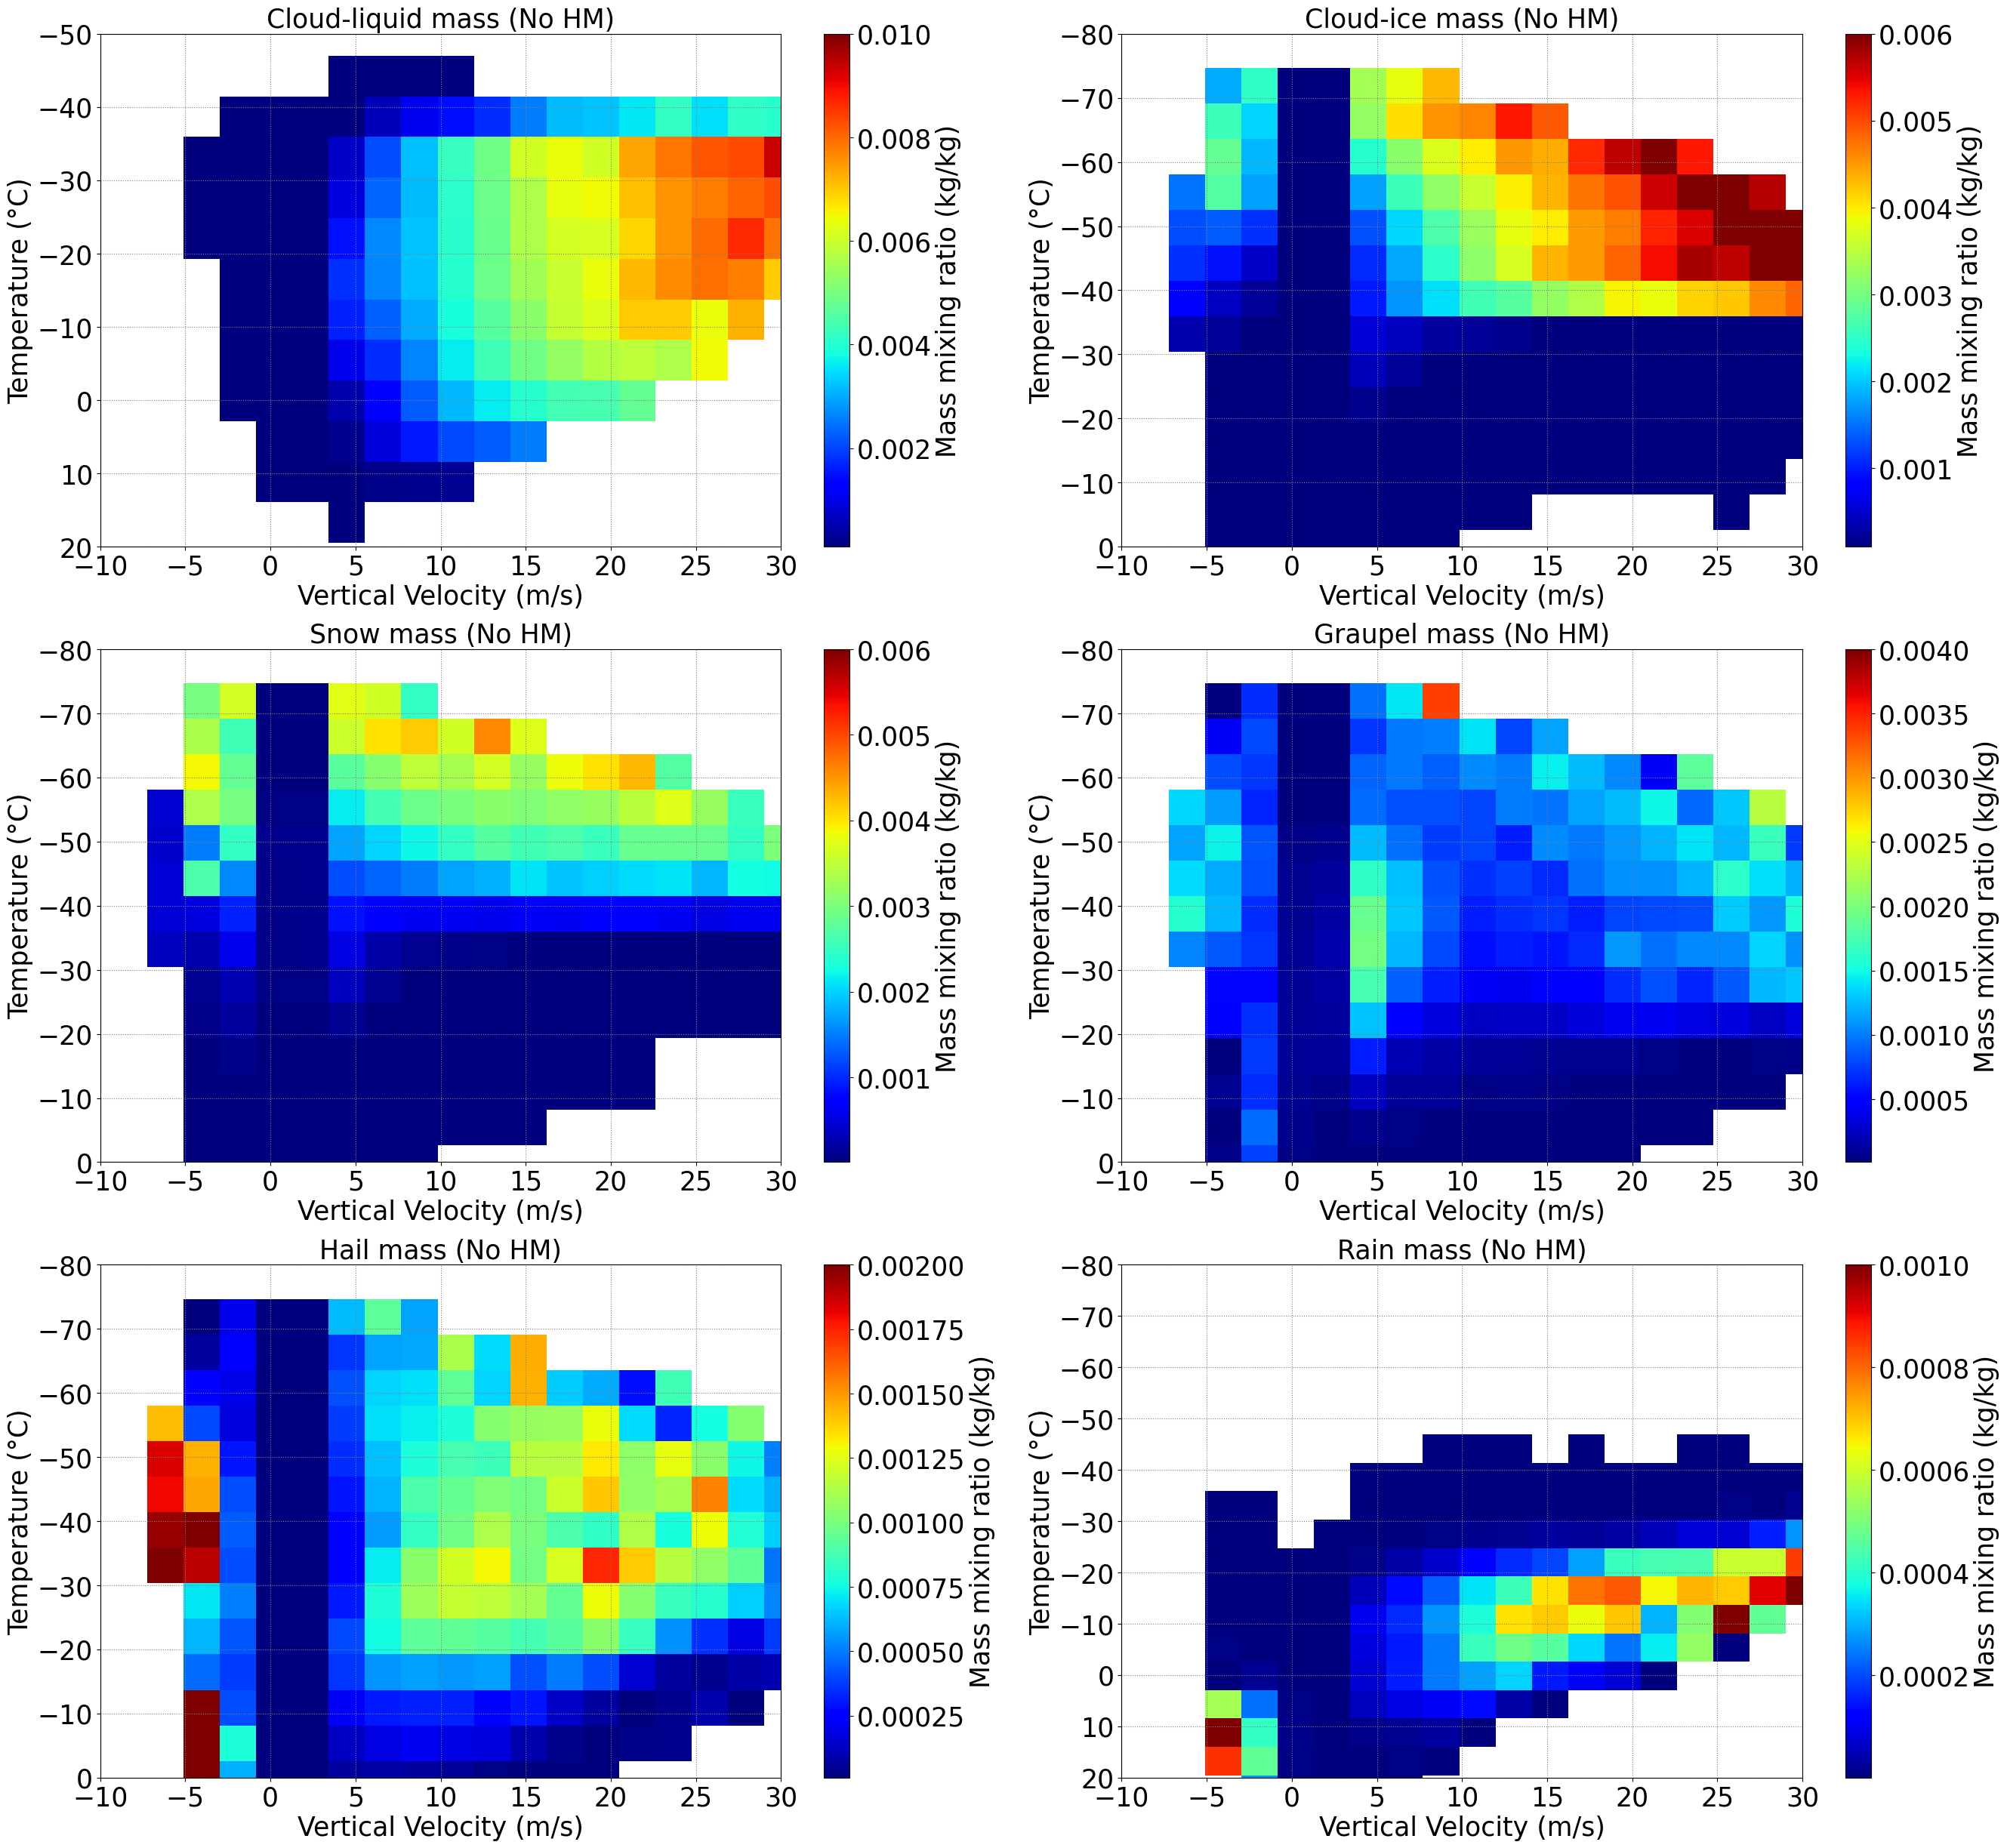

In [20]:


fontsize = 25;

plt.figure(figsize=(32, 30))
plt.subplot(3,2,1)
contour=plt.imshow(avg_qc_temp_w_nohm, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=1.e-2, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-liquid mass (No HM)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(avg_qi_temp_w_nohm, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-ice mass (No HM)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(avg_qs_temp_w_nohm, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Snow mass (No HM)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(avg_qg_temp_w_nohm, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=4.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Graupel mass (No HM)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(avg_qh_temp_w_nohm, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=2.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Hail mass (No HM)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(avg_qr_temp_w_nohm, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-6, vmax=1.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Rain mass (No HM)', fontsize=fontsize)

plt.show()


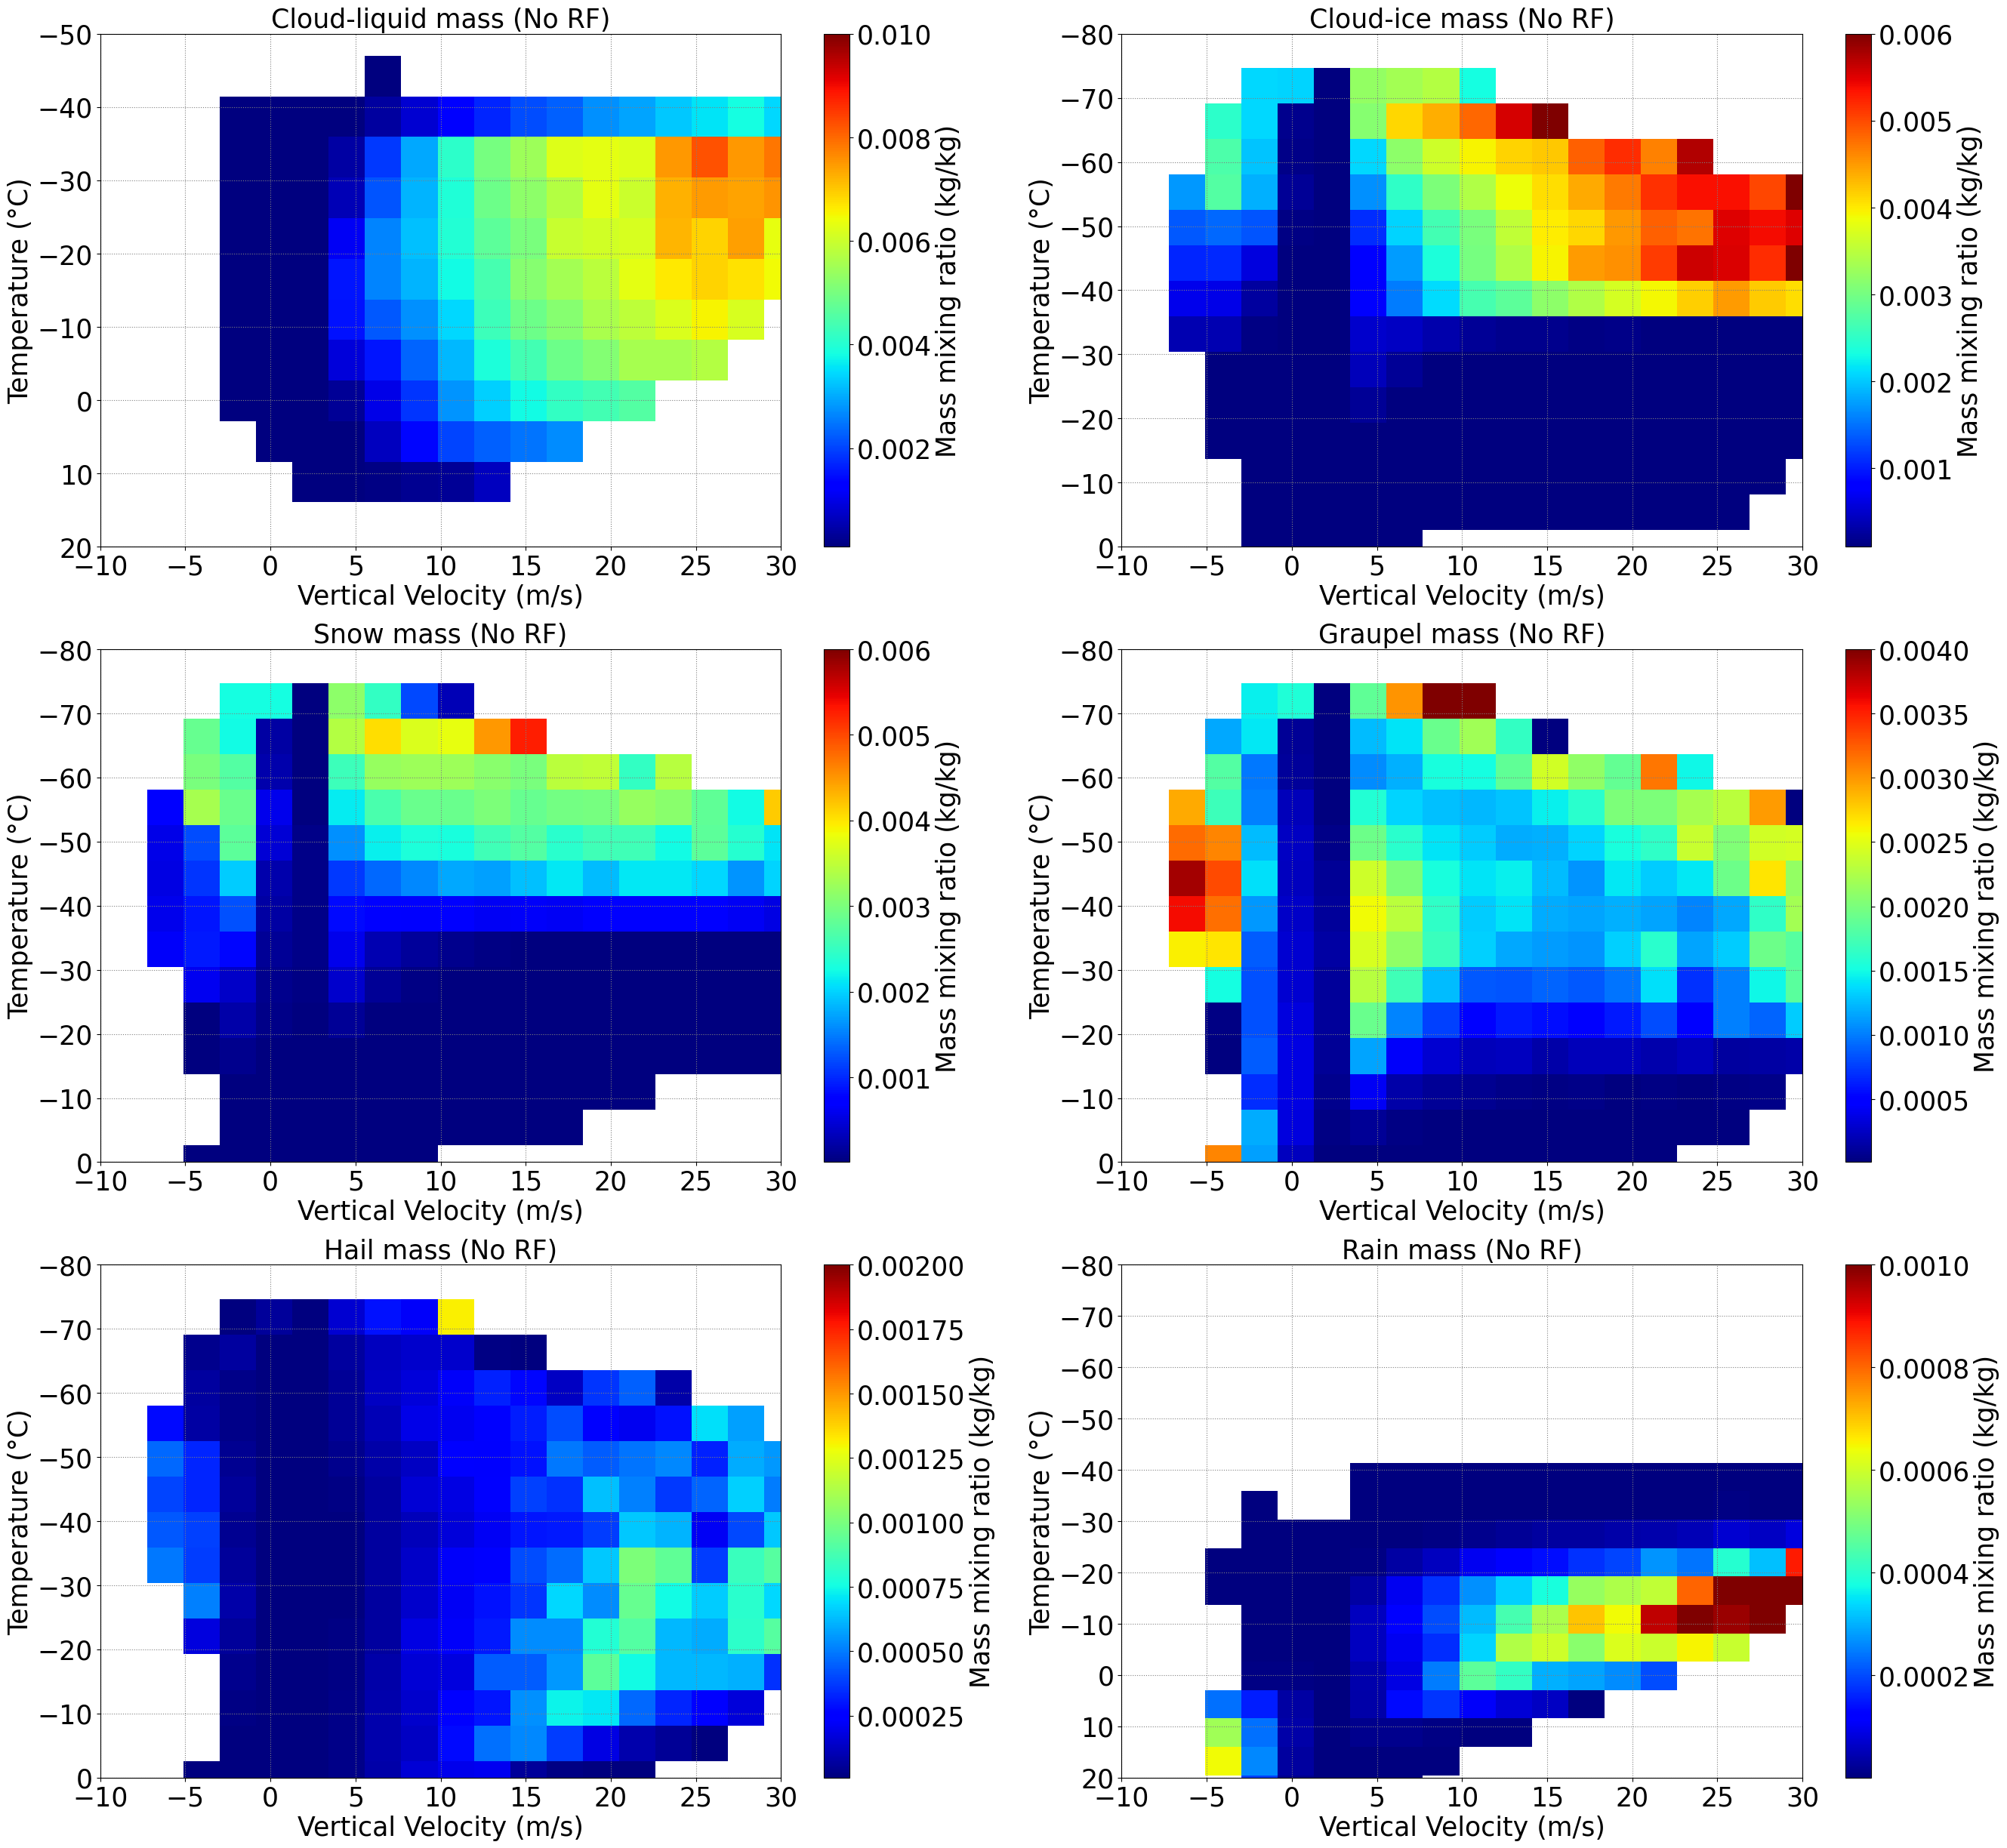

In [21]:


fontsize = 25;

plt.figure(figsize=(32, 30))
plt.subplot(3,2,1)
contour=plt.imshow(avg_qc_temp_w_norf, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=1.e-2, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-liquid mass (No RF)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(avg_qi_temp_w_norf, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-4, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Cloud-ice mass (No RF)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(avg_qs_temp_w_norf, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=6.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Snow mass (No RF)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(avg_qg_temp_w_norf, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=4.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Graupel mass (No RF)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(avg_qh_temp_w_norf, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-5, vmax=2.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Hail mass (No RF)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(avg_qr_temp_w_norf, extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=1.e-6, vmax=1.e-3, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=1.0)
plt.xlim(-10, 30)
plt.xticks([-10, -5, 0, 5, 10, 15, 20, 25, 30], fontsize=fontsize)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Rain mass (No RF)', fontsize=fontsize)

plt.show()


In [ ]:
filt_inc_sip
mean_inc_sip
avg_tempc

Text(0.5, 1.0, 'Updraft (w > 4 m s$^{-1}$)')

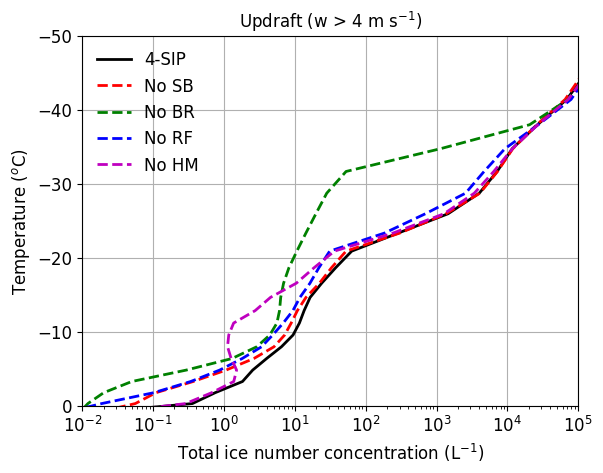

In [52]:

thres_w = 4.;
thres_inc = 1.e-4;
filt_inc_nosip = xr.where((ds_nosip.inc_perl > thres_inc) & (ds_nosip.w_vel > thres_w), ds_nosip.inc_perl, np.nan);

filt_inc_sip = xr.where((ds_sip.inc_perl > thres_inc) & (ds_sip.w_vel > thres_w), ds_sip.inc_perl, np.nan);
filt_inc_4sip = xr.where((ds_4sip.inc_perl > thres_inc) & (ds_4sip.w_vel > thres_w), ds_4sip.inc_perl, np.nan);
filt_inc_nohm = xr.where((ds_nohm.inc_perl > thres_inc) & (ds_nohm.w_vel > thres_w), ds_nohm.inc_perl, np.nan);
filt_inc_norf = xr.where((ds_norf.inc_perl > thres_inc) & (ds_norf.w_vel > thres_w), ds_norf.inc_perl, np.nan);
filt_inc_nobr = xr.where((ds_nobr.inc_perl > thres_inc) & (ds_nobr.w_vel > thres_w), ds_nobr.inc_perl, np.nan);
filt_inc_nosb = xr.where((ds_nosb.inc_perl > thres_inc) & (ds_nosb.w_vel > thres_w), ds_nosb.inc_perl, np.nan);
avg_tempc = ds_sip.tempc.mean(dim=('time','ncells'))


mean_inc_nosip = filt_inc_nosip.mean(dim=('time','ncells'))
mean_inc_sip = filt_inc_sip.mean(dim=('time','ncells'))            # start time of simulation is different than others
mean_inc_4sip = filt_inc_4sip.mean(dim=('time','ncells'))
mean_inc_nohm = filt_inc_nohm.mean(dim=('time','ncells'))
mean_inc_norf = filt_inc_norf.mean(dim=('time','ncells'))
mean_inc_nobr = filt_inc_nobr.mean(dim=('time','ncells'))
mean_inc_nosb = filt_inc_nosb.mean(dim=('time','ncells'))


#plt.plot(mean_inc_nosip, avg_tempc, 'k-', linewidth=2, label='No SIP')
plt.plot(mean_inc_4sip, avg_tempc, 'k-', linewidth=2, label='4-SIP')
plt.plot(mean_inc_nosb, avg_tempc, 'r--', linewidth=2, label='No SB')
plt.plot(mean_inc_nobr, avg_tempc, 'g--', linewidth=2, label='No BR')
plt.plot(mean_inc_norf, avg_tempc, 'b--', linewidth=2, label='No RF')
plt.plot(mean_inc_nohm, avg_tempc, 'm--', linewidth=2, label='No HM')
#plt.plot(mean_inc_4sip-mean_inc_nosb, avg_tempc, 'c-', linewidth=2, label='3-SIP [No SB]')
#plt.plot(mean_inc_nohm, avg_tempc, 'b-', linewidth=2, label='No rime-splintering')
#plt.plot(mean_inc_norf, avg_tempc, 'm-', linewidth=2, label='No Raindrop shattering')
#plt.plot(mean_inc_nobr, avg_tempc, 'g-', linewidth=2, label='No IIC-Phillips')
plt.xscale('log')
plt.xlabel('Total ice number concentration (L$^{-1}$)', fontsize=12)
plt.ylabel('Temperature ($^{o}$C)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.legend(frameon=False, loc='best', fontsize=12)
plt.ylim(0, -50.)
plt.grid(True)
plt.xlim(1.e-2, 1.e5)
plt.title('Updraft (w > 4 m s$^{-1}$)', fontsize=12)

Text(0.5, 1.0, 'Downdraft (w < -4 m s$^{-1}$)')

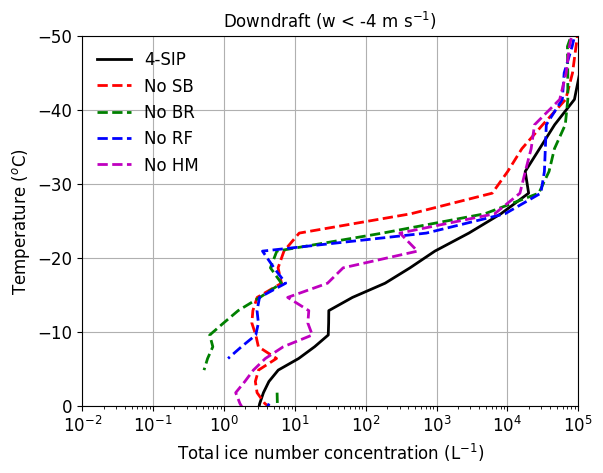

In [51]:

thres_w = -4.;
thres_inc = 1.e-4;
filt_inc_nosip = xr.where((ds_nosip.inc_perl > thres_inc) & (ds_nosip.w_vel < thres_w), ds_nosip.inc_perl, np.nan);

filt_inc_sip = xr.where((ds_sip.inc_perl > thres_inc) & (ds_sip.w_vel < thres_w), ds_sip.inc_perl, np.nan);
filt_inc_4sip = xr.where((ds_4sip.inc_perl > thres_inc) & (ds_4sip.w_vel < thres_w), ds_4sip.inc_perl, np.nan);
filt_inc_nohm = xr.where((ds_nohm.inc_perl > thres_inc) & (ds_nohm.w_vel < thres_w), ds_nohm.inc_perl, np.nan);
filt_inc_norf = xr.where((ds_norf.inc_perl > thres_inc) & (ds_norf.w_vel < thres_w), ds_norf.inc_perl, np.nan);
filt_inc_nobr = xr.where((ds_nobr.inc_perl > thres_inc) & (ds_nobr.w_vel < thres_w), ds_nobr.inc_perl, np.nan);
filt_inc_nosb = xr.where((ds_nosb.inc_perl > thres_inc) & (ds_nosb.w_vel < thres_w), ds_nosb.inc_perl, np.nan);
avg_tempc = ds_sip.tempc.mean(dim=('time','ncells'))


mean_inc_nosip = filt_inc_nosip.mean(dim=('time','ncells'))
mean_inc_sip = filt_inc_sip.mean(dim=('time','ncells'))            # start time of simulation is different than others
mean_inc_4sip = filt_inc_4sip.mean(dim=('time','ncells'))
mean_inc_nohm = filt_inc_nohm.mean(dim=('time','ncells'))
mean_inc_norf = filt_inc_norf.mean(dim=('time','ncells'))
mean_inc_nobr = filt_inc_nobr.mean(dim=('time','ncells'))
mean_inc_nosb = filt_inc_nosb.mean(dim=('time','ncells'))


#plt.plot(mean_inc_nosip, avg_tempc, 'k-', linewidth=2, label='No SIP')
plt.plot(mean_inc_4sip, avg_tempc, 'k-', linewidth=2, label='4-SIP')
plt.plot(mean_inc_nosb, avg_tempc, 'r--', linewidth=2, label='No SB')
plt.plot(mean_inc_nobr, avg_tempc, 'g--', linewidth=2, label='No BR')
plt.plot(mean_inc_norf, avg_tempc, 'b--', linewidth=2, label='No RF')
plt.plot(mean_inc_nohm, avg_tempc, 'm--', linewidth=2, label='No HM')
#plt.plot(mean_inc_4sip-mean_inc_nosb, avg_tempc, 'c-', linewidth=2, label='3-SIP [No SB]')
#plt.plot(mean_inc_nohm, avg_tempc, 'b-', linewidth=2, label='No rime-splintering')
#plt.plot(mean_inc_norf, avg_tempc, 'm-', linewidth=2, label='No Raindrop shattering')
#plt.plot(mean_inc_nobr, avg_tempc, 'g-', linewidth=2, label='No IIC-Phillips')
plt.xscale('log')
plt.xlabel('Total ice number concentration (L$^{-1}$)', fontsize=12)
plt.ylabel('Temperature ($^{o}$C)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.legend(frameon=False, loc='best', fontsize=12)
plt.ylim(0, -50.)
plt.grid(True)
plt.xlim(1.e-2, 1.e5)
plt.title('Downdraft (w < -4 m s$^{-1}$)', fontsize=12)

Text(0.5, 1.0, 'SIP Process rates')

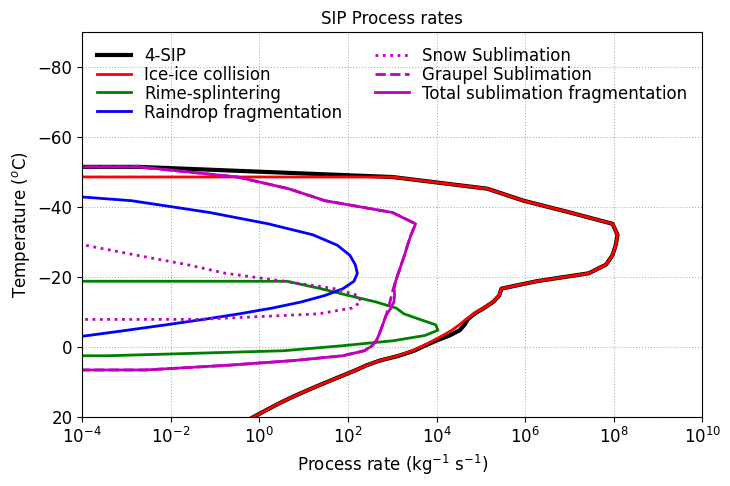

In [54]:

thres_w = 0.;
thres_q = 1.e-6;
ds_4sip['dqni_tot_sbf'] = ds_4sip.dqni_snow_sbf + ds_4sip.dqni_graup_sbf
avg_tempc = ds_4sip.tempc.mean(dim=('time','ncells'))

filt_cond = (ds_4sip.tqi > thres_q) & (np.abs(ds_4sip.w_vel) > thres_w)
filt_ni_4sip = xr.where(filt_cond, ds_4sip.dqni_sec, np.nan)
filt_ni_br = xr.where(filt_cond, ds_4sip.dqni_br, np.nan)
filt_ni_hm = xr.where(filt_cond, ds_4sip.dqni_rs, np.nan)
filt_ni_rf = xr.where(filt_cond, ds_4sip.dqni_ds, np.nan)
filt_ni_snow_sb = xr.where(filt_cond, ds_4sip.dqni_snow_sbf, np.nan)
filt_ni_graup_sb = xr.where(filt_cond, ds_4sip.dqni_graup_sbf, np.nan)
filt_ni_tot_sb = xr.where(filt_cond, ds_4sip.dqni_tot_sbf, np.nan)

mean_dni_4sip = filt_ni_4sip.mean(dim=('time','ncells'))
mean_dni_br = filt_ni_br.mean(dim=('time','ncells'))
mean_dni_hm = filt_ni_hm.mean(dim=('time','ncells'))
mean_dni_rf = filt_ni_rf.mean(dim=('time','ncells'))
mean_dni_snow_sb = filt_ni_snow_sb.mean(dim=('time','ncells'))
mean_dni_graup_sb = filt_ni_graup_sb.mean(dim=('time','ncells'))
mean_dni_tot_sb = filt_ni_tot_sb.mean(dim=('time','ncells'))

mean_dni_4sip = mean_dni_4sip.where(avg_tempc >= -55, np.nan)
mean_dni_br = mean_dni_br.where(avg_tempc >= -55, np.nan)
mean_dni_graup_sb = mean_dni_graup_sb.where(avg_tempc >= -55, np.nan)
mean_dni_tot_sb = mean_dni_tot_sb.where(avg_tempc >= -55, np.nan)

linewidth=3

plt.figure(figsize=(8, 5))
plt.plot(mean_dni_4sip, avg_tempc, 'k-', linewidth=linewidth, label='4-SIP')
plt.plot(mean_dni_br, avg_tempc, 'r-', linewidth=linewidth-1, label='Ice-ice collision')
plt.plot(mean_dni_hm, avg_tempc, 'g-', linewidth=linewidth-1, label='Rime-splintering')
plt.plot(mean_dni_rf, avg_tempc, 'b-', linewidth=linewidth-1, label='Raindrop fragmentation')
plt.plot(mean_dni_snow_sb, avg_tempc, 'm:', linewidth=linewidth-1, label='Snow Sublimation')
plt.plot(mean_dni_graup_sb, avg_tempc, 'm--', linewidth=linewidth-1, label='Graupel Sublimation')
plt.plot(mean_dni_tot_sb, avg_tempc, 'm-', linewidth=linewidth-1, label='Total sublimation fragmentation')
plt.xscale('log')
plt.xlabel('Process rate (kg$^{-1}$ s$^{-1}$)', fontsize=12)
plt.ylabel('Temperature ($^{o}$C)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, ncol=2, loc='upper left', fontsize=12)
plt.ylim(20, -90.)
plt.grid(True, linestyle=':', color='grey', alpha=0.6)
plt.xlim(1.e-4, 1.e10)
plt.title('SIP Process rates', fontsize=12)

In [6]:

grid_steps = xr.open_dataset('/work/bk1415/b382718/output/steps/nested_run/icon_output/continental_ccn/light_param/SIP/20000619_21/steps_2mom_sip/domain4_DOM04.nc');

clon_deg = np.degrees(grid_steps.clon)
clat_deg = np.degrees(grid_steps.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-102., 40.])
#print(okla_x), print(okla_y)
dx_deg = 1.; dy_deg = 1.
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)


window_cell = (
    (grid_steps.clat >= np.deg2rad(bottom_bound))
    & (grid_steps.clat <= np.deg2rad(top_bound))
    & (grid_steps.clon >= np.deg2rad(left_bound))
    & (grid_steps.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)

# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_steps.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_steps.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)

vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}

def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid



-104.03640368667047
-99.96295237559231
37.96466532654236
42.03547401194576
-103.0
-101.0
41.0
39.0
window_vertex_indices :: [ 3428  3433  3434 ... 27926 27927 27928]
window_edge_indices :: [10410 10411 10412 ... 81419 81420 81421]


In [7]:

new_grid_steps = reindex_grid(grid_steps, selected_indices, vars_to_renumber)

mask=np.isin(ds_sip['ncells'], selected_indices.cell)
mask_cell = mask

In [56]:


aircraft_starttime='2000-06-19T18:00:00.000000000'
aircraft_endtime='2000-06-20T02:00:00.000000000'

ds_nosip_new = ds_nosip.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
ds_sip_new = ds_sip.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
ds_3sip_new = ds_nosb.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))
ds_4sip_new = ds_4sip.sel(ncells=mask,time=slice(aircraft_starttime, aircraft_endtime))


In [10]:

w_thres = 1.
###### Without SIP
# lwc gperm3
filt_lwc_up_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.lwc_gperm3, np.nan)
filt_lwc_dn_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.lwc_gperm3, np.nan)
filt_lwc_st_perl = xr.where((ds_nosip_new.lwc_gperm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.lwc_gperm3, np.nan)

lwc_up_nosip = filt_lwc_up_perl.mean(dim=('time','ncells'))
lwc_dn_nosip = filt_lwc_dn_perl.mean(dim=('time','ncells'))
lwc_st_nosip = filt_lwc_st_perl.mean(dim=('time','ncells'))

tempc_nosip = ds_nosip_new.tempc.mean(dim=('time','ncells'))

# iwc gperm3
filt_tiwc_up_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.tiwc_gperm3, np.nan)
filt_tiwc_dn_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.tiwc_gperm3, np.nan)
filt_tiwc_st_perl = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.tiwc_gperm3, np.nan)

tiwc_up_nosip = filt_tiwc_up_perl.mean(dim=('time','ncells'))
tiwc_dn_nosip = filt_tiwc_dn_perl.mean(dim=('time','ncells'))
tiwc_st_nosip = filt_tiwc_st_perl.mean(dim=('time','ncells'))

# CDNC percm3
filt_cdnc_up_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.cdnc_percm3, np.nan)
filt_cdnc_dn_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (ds_nosip_new.w_vel < -1.*w_thres), ds_nosip_new.cdnc_percm3, np.nan)
filt_cdnc_st_perl = xr.where((ds_nosip_new.cdnc_percm3 > 1.e-6) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.cdnc_percm3, np.nan)

cdnc_up_nosip = filt_cdnc_up_perl.mean(dim=('time','ncells'))
cdnc_dn_nosip = filt_cdnc_dn_perl.mean(dim=('time','ncells'))
cdnc_st_nosip = filt_cdnc_st_perl.mean(dim=('time','ncells'))


###### With SIP
# lwc gperm3
filt_lwc_up_perl = xr.where((ds_sip_new.lwc_gperm3 > 1.e-6) & (ds_sip_new.w_vel > w_thres), ds_sip_new.lwc_gperm3, np.nan)
filt_lwc_dn_perl = xr.where((ds_sip_new.lwc_gperm3 > 1.e-6) & (ds_sip_new.w_vel < -1.*w_thres), ds_sip_new.lwc_gperm3, np.nan)
filt_lwc_st_perl = xr.where((ds_sip_new.lwc_gperm3 > 1.e-6) & (np.abs(ds_sip_new.w_vel) < w_thres), ds_sip_new.lwc_gperm3, np.nan)

lwc_up_sip = filt_lwc_up_perl.mean(dim=('time','ncells'))
lwc_dn_sip = filt_lwc_dn_perl.mean(dim=('time','ncells'))
lwc_st_sip = filt_lwc_st_perl.mean(dim=('time','ncells'))

tempc_sip = ds_sip_new.tempc.mean(dim=('time','ncells'))

# iwc gperm3
filt_tiwc_up_perl = xr.where((ds_sip_new.tiwc_gperm3 > 1.e-6) & (ds_sip_new.w_vel > w_thres), ds_sip_new.tiwc_gperm3, np.nan)
filt_tiwc_dn_perl = xr.where((ds_sip_new.tiwc_gperm3 > 1.e-6) & (ds_sip_new.w_vel < -1.*w_thres), ds_sip_new.tiwc_gperm3, np.nan)
filt_tiwc_st_perl = xr.where((ds_sip_new.tiwc_gperm3 > 1.e-6) & (np.abs(ds_sip_new.w_vel) < w_thres), ds_sip_new.tiwc_gperm3, np.nan)

tiwc_up_sip = filt_tiwc_up_perl.mean(dim=('time','ncells'))
tiwc_dn_sip = filt_tiwc_dn_perl.mean(dim=('time','ncells'))
tiwc_st_sip = filt_tiwc_st_perl.mean(dim=('time','ncells'))

# CDNC percm3
filt_cdnc_up_perl = xr.where((ds_sip_new.cdnc_percm3 > 1.e-6) & (ds_sip_new.w_vel > w_thres), ds_sip_new.cdnc_percm3, np.nan)
filt_cdnc_dn_perl = xr.where((ds_sip_new.cdnc_percm3 > 1.e-6) & (ds_sip_new.w_vel < -1.*w_thres), ds_sip_new.cdnc_percm3, np.nan)
filt_cdnc_st_perl = xr.where((ds_sip_new.cdnc_percm3 > 1.e-6) & (np.abs(ds_sip_new.w_vel) < w_thres), ds_sip_new.cdnc_percm3, np.nan)

cdnc_up_sip = filt_cdnc_up_perl.mean(dim=('time','ncells'))
cdnc_dn_sip = filt_cdnc_dn_perl.mean(dim=('time','ncells'))
cdnc_st_sip = filt_cdnc_st_perl.mean(dim=('time','ncells'))


In [53]:

####================== Boxplot of ICON-LWC
w_thres = 1.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
lwc_nosip_up_gperm3 = xr.where((ds_nosip_new.qc > thres_q) & (ds_nosip_new.w_vel > w_thres), ds_nosip_new.lwc_gperm3, np.nan)
lwc_nosip_dn_gperm3 = xr.where((ds_nosip_new.qc > thres_q) & (ds_nosip_new.w_vel > -1.*w_thres), ds_nosip_new.lwc_gperm3, np.nan)
lwc_nosip_st_gperm3 = xr.where((ds_nosip_new.qc > thres_q) & (np.abs(ds_nosip_new.w_vel) < w_thres), ds_nosip_new.lwc_gperm3, np.nan)
tempc_nosip = ds_nosip_new.tempc

lwc_nosip_up_gperm3 = lwc_nosip_up_gperm3.values.flatten()
lwc_nosip_dn_gperm3 = lwc_nosip_dn_gperm3.values.flatten()
lwc_nosip_st_gperm3 = lwc_nosip_st_gperm3.values.flatten()
tempc_nosip = tempc_nosip.values.flatten()

df_lwc_nosip = pd.DataFrame({
    'lwc_up': lwc_nosip_up_gperm3,
    'lwc_dn': lwc_nosip_dn_gperm3,
    'lwc_st': lwc_nosip_st_gperm3,
    'tempc': tempc_nosip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_lwc_nosip['temp_bin'] = np.digitize(df_lwc_nosip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_lwc_nosip['temp_bin'] = bin_edges[df_lwc_nosip['temp_bin']]

df_lwc_up_nosip = df_lwc_nosip[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_nosip = df_lwc_nosip[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_nosip = df_lwc_nosip[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_nosip = df_lwc_up_nosip.dropna(subset=['temp_bin'])
df_lwc_dn_nosip = df_lwc_dn_nosip.dropna(subset=['temp_bin'])
df_lwc_st_nosip = df_lwc_st_nosip.dropna(subset=['temp_bin'])

lwc_nosip_up_by_bin = [df_lwc_up_nosip[df_lwc_up_nosip['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_nosip_dn_by_bin = [df_lwc_dn_nosip[df_lwc_dn_nosip['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_nosip_st_by_bin = [df_lwc_st_nosip[df_lwc_st_nosip['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]


In [57]:

####================== Boxplot of ICON-LWC [4-SIP]
w_thres = 1.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
lwc_4sip_up_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.lwc_gperm3, np.nan)
lwc_4sip_dn_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.lwc_gperm3, np.nan)
lwc_4sip_st_gperm3 = xr.where((ds_4sip_new.qc > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.lwc_gperm3, np.nan)
tempc_4sip = ds_4sip_new.tempc

lwc_4sip_up_gperm3 = lwc_4sip_up_gperm3.values.flatten()
lwc_4sip_dn_gperm3 = lwc_4sip_dn_gperm3.values.flatten()
lwc_4sip_st_gperm3 = lwc_4sip_st_gperm3.values.flatten()
tempc_4sip = tempc_4sip.values.flatten()

df_lwc_4sip = pd.DataFrame({
    'lwc_up': lwc_4sip_up_gperm3,
    'lwc_dn': lwc_4sip_dn_gperm3,
    'lwc_st': lwc_4sip_st_gperm3,
    'tempc': tempc_4sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_lwc_4sip['temp_bin'] = np.digitize(df_lwc_4sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_lwc_4sip['temp_bin'] = bin_edges[df_lwc_4sip['temp_bin']]

df_lwc_up_4sip = df_lwc_4sip[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_4sip = df_lwc_4sip[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_4sip = df_lwc_4sip[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_4sip = df_lwc_up_4sip.dropna(subset=['temp_bin'])
df_lwc_dn_4sip = df_lwc_dn_4sip.dropna(subset=['temp_bin'])
df_lwc_st_4sip = df_lwc_st_4sip.dropna(subset=['temp_bin'])

lwc_4sip_up_by_bin = [df_lwc_up_4sip[df_lwc_up_4sip['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_4sip_dn_by_bin = [df_lwc_dn_4sip[df_lwc_dn_4sip['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_4sip_st_by_bin = [df_lwc_st_4sip[df_lwc_st_4sip['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]


In [61]:

####================== Boxplot of ICON-LWC [3-SIP]
w_thres = 1.
thres_q = 1.e-6
###### Without SIP
# lwc gperm3
cdnc_4sip_up_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.cdnc_percm3, np.nan)
cdnc_4sip_dn_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.cdnc_percm3, np.nan)
cdnc_4sip_st_percm3 = xr.where((ds_4sip_new.qc > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.cdnc_percm3, np.nan)
tempc_4sip = ds_4sip_new.tempc

cdnc_4sip_up_percm3 = cdnc_4sip_up_percm3.values.flatten()
cdnc_4sip_dn_percm3 = cdnc_4sip_dn_percm3.values.flatten()
cdnc_4sip_st_percm3 = cdnc_4sip_st_percm3.values.flatten()
tempc_4sip = tempc_4sip.values.flatten()

df_cdnc_4sip = pd.DataFrame({
    'cdnc_up': cdnc_4sip_up_percm3,
    'cdnc_dn': cdnc_4sip_dn_percm3,
    'cdnc_st': cdnc_4sip_st_percm3,
    'tempc': tempc_4sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_cdnc_4sip['temp_bin'] = np.digitize(df_cdnc_4sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_cdnc_4sip['temp_bin'] = bin_edges[df_cdnc_4sip['temp_bin']]

df_cdnc_up_4sip = df_cdnc_4sip[['cdnc_up', 'temp_bin']].dropna()
df_cdnc_dn_4sip = df_cdnc_4sip[['cdnc_dn', 'temp_bin']].dropna()
df_cdnc_st_4sip = df_cdnc_4sip[['cdnc_st', 'temp_bin']].dropna()

df_cdnc_up_4sip = df_cdnc_up_4sip.dropna(subset=['temp_bin'])
df_cdnc_dn_4sip = df_cdnc_dn_4sip.dropna(subset=['temp_bin'])
df_cdnc_st_4sip = df_cdnc_st_4sip.dropna(subset=['temp_bin'])

cdnc_4sip_up_by_bin = [df_cdnc_up_4sip[df_cdnc_up_4sip['temp_bin'] == temp]['cdnc_up'].values for temp in bin_edges]
cdnc_4sip_dn_by_bin = [df_cdnc_dn_4sip[df_cdnc_dn_4sip['temp_bin'] == temp]['cdnc_dn'].values for temp in bin_edges]
cdnc_4sip_st_by_bin = [df_cdnc_st_4sip[df_cdnc_st_4sip['temp_bin'] == temp]['cdnc_st'].values for temp in bin_edges]


In [76]:

####================== Boxplot of ICON-LWC [3-SIP]
w_thres = 1.
thres_q = 1.e-5
###### Without SIP
# lwc gperm3
inc_4sip_up_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > w_thres), ds_4sip_new.inc_perl, np.nan)
inc_4sip_dn_perl = xr.where((ds_4sip_new.tqi > thres_q) & (ds_4sip_new.w_vel > -1.*w_thres), ds_4sip_new.inc_perl, np.nan)
inc_4sip_st_perl = xr.where((ds_4sip_new.tqi > thres_q) & (np.abs(ds_4sip_new.w_vel) < w_thres), ds_4sip_new.inc_perl, np.nan)
tempc_4sip = ds_4sip_new.tempc

inc_4sip_up_perl = inc_4sip_up_perl.values.flatten()
inc_4sip_dn_perl = inc_4sip_dn_perl.values.flatten()
inc_4sip_st_perl = inc_4sip_st_perl.values.flatten()
tempc_4sip = tempc_4sip.values.flatten()

df_inc_4sip = pd.DataFrame({
    'inc_up': inc_4sip_up_perl,
    'inc_dn': inc_4sip_dn_perl,
    'inc_st': inc_4sip_st_perl,
    'tempc': tempc_4sip,
})

tempc_bin = np.arange(-50., 20., 5.)  # Temperature bins 
tempc_bin = np.sort(tempc_bin)

df_inc_4sip['temp_bin'] = np.digitize(df_inc_4sip['tempc'], bins=tempc_bin, right=False)

bin_edges = np.concatenate([tempc_bin - 2, [tempc_bin[-1] + 2]])  
df_inc_4sip['temp_bin'] = bin_edges[df_inc_4sip['temp_bin']]

df_inc_up_4sip = df_inc_4sip[['inc_up', 'temp_bin']].dropna()
df_inc_dn_4sip = df_inc_4sip[['inc_dn', 'temp_bin']].dropna()
df_inc_st_4sip = df_inc_4sip[['inc_st', 'temp_bin']].dropna()

df_inc_up_4sip = df_inc_up_4sip.dropna(subset=['temp_bin'])
df_inc_dn_4sip = df_inc_dn_4sip.dropna(subset=['temp_bin'])
df_inc_st_4sip = df_inc_st_4sip.dropna(subset=['temp_bin'])

inc_4sip_up_by_bin = [df_inc_up_4sip[df_inc_up_4sip['temp_bin'] == temp]['inc_up'].values for temp in bin_edges]
inc_4sip_dn_by_bin = [df_inc_dn_4sip[df_inc_dn_4sip['temp_bin'] == temp]['inc_dn'].values for temp in bin_edges]
inc_4sip_st_by_bin = [df_inc_st_4sip[df_inc_st_4sip['temp_bin'] == temp]['inc_st'].values for temp in bin_edges]


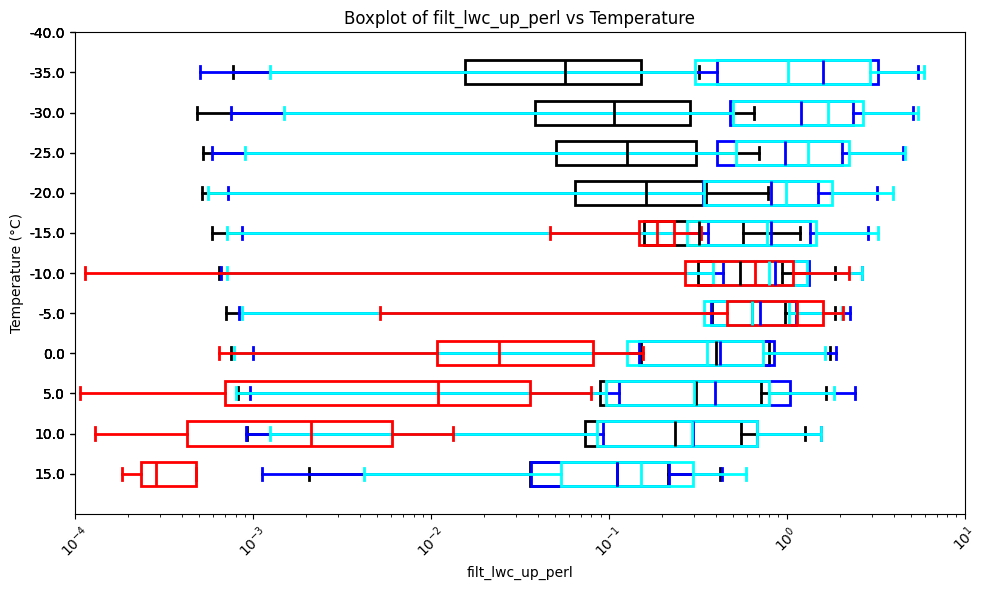

In [60]:
plt.figure(figsize=(10, 6))
linewidth=2.0;
alpha=1.0;

plt.boxplot(lwc_nosip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=3.0,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha),
            showfliers=False)
plt.boxplot(lwc_4sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=3.0,
            boxprops=dict(facecolor='none', edgecolor='blue', linewidth=linewidth, alpha=alpha),
            medianprops=dict(color='blue', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='blue', alpha=alpha),
            capprops=dict(linewidth=linewidth, color='blue', alpha=alpha),
            showfliers=False)
plt.boxplot(lwc_3sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=3.0,
            boxprops=dict(facecolor='none', edgecolor='cyan', linewidth=linewidth, alpha=alpha),
            medianprops=dict(color='cyan', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='cyan', alpha=alpha),
            capprops=dict(linewidth=linewidth, color='cyan', alpha=alpha),
            showfliers=False)
plt.boxplot(lwc_fssp_up_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
            widths=3.0,
            boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha),  
            medianprops=dict(color='red', linewidth=linewidth),  
            whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha),  
            capprops=dict(linewidth=linewidth, color='red', alpha=alpha),
            showfliers=False)
# Customize the plot
plt.xscale('log')
plt.xlim(1.e-4, 1.e1)
plt.ylim(20,-40)
#plt.yticks([0, -5, -10, -15, -20, -25, -30, -35, -40])
#plt.yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40'], fontsize=fontsize)
plt.xlabel('filt_lwc_up_perl')
plt.ylabel('Temperature (°C)')
plt.title('Boxplot of filt_lwc_up_perl vs Temperature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:

# Open the dataset
import xarray as xr
import netCDF4

ds_air_obs = netCDF4.Dataset('/work/bk1415/b382718/output/steps/observations/aircraft_data/T28_STEPS2000_756.nc', 'r')
#print(ds_air_obs.variables)  # View available variables

ds_obs_tim = ds_air_obs.variables['Time'][:]
ds_obs_hrs = ds_air_obs.variables['TIME_HOURS_20Hz'][:]  
ds_obs_min = ds_air_obs.variables['TIME_MINUTES_20Hz'][:]  
ds_obs_sec = ds_air_obs.variables['TIME_SECONDS_20Hz'][:]                                  
ds_obs_temp_rm = ds_air_obs.variables['TEMPERATURE_ROSEMOUNT_SENSOR'][:]                 # C
ds_obs_temp_rf = ds_air_obs.variables['TEMPERATURE_REVERSE_FLOW_SENSOR'][:]              # C
ds_obs_air_den = ds_air_obs.variables['DENSITY_AIR'][:]                                  # kg/m3
ds_obs_no_conc = ds_air_obs.variables['NO_CONCENTRATION'][:]                             # ppb
ds_obs_fssp_lwc = ds_air_obs.variables['FSSP_LIQUID_WATER'][:]                           # g/m3
ds_obs_tot_cnt = ds_air_obs.variables['FSSP_TOTAL_COUNTS'][:]                            # count
ds_obs_fssp_diam = ds_air_obs.variables['FSSP_AVERAGE_DIAMETER'][:]                      # µm
ds_obs_fssp_tot_conc = ds_air_obs.variables['FSSP_TOTAL_PARTICLE_CONCENTRATION'][:]      # count/cm3
ds_obs_fssp_eq_diam = ds_air_obs.variables['FSSP_EQUIVALENT_DIAMETER'][:]                # µm
ds_obs_fssp_qc = ds_air_obs.variables['FSSP_LIQUID_WATER_MIXING_RATIO'][:]               # gperkg
ds_obs_w = ds_air_obs.variables['UPDRAFT'][:]               # gperkg


###
mask_rho = (ds_obs_air_den < 0.5)
ds_obs_air_den[mask_rho] = np.nan
ds_obs_avg_rho = np.nanmean(ds_obs_air_den, axis=1) 
###

###
#mask_diam = (ds_obs_fssp_diam > 100.)
#ds_obs_fssp_diam[mask_diam] = np.nan
ds_obs_avg_diam = np.nanmean(ds_obs_fssp_diam, axis=1) 
###

###
#mask_tot_conc = (ds_obs_fssp_tot_conc > 2500.)
#ds_obs_fssp_tot_conc[mask_tot_conc] = np.nan
ds_obs_avg_tot_conc = np.nanmean(ds_obs_fssp_tot_conc, axis=1) 
###

###
#mask_eq_diam = (ds_obs_fssp_eq_diam > 100.)
#ds_obs_fssp_eq_diam[mask_eq_diam] = np.nan
ds_obs_avg_eqv_diam = np.nanmean(ds_obs_fssp_eq_diam, axis=1) 
###

###
#mask_qc = (ds_obs_fssp_qc > 25.)
#ds_obs_fssp_qc[mask_qc] = np.nan
ds_obs_avg_qc = np.nanmean(ds_obs_fssp_qc, axis=1) 
###

###
#mask_lwc = (ds_obs_fssp_lwc > 6.)
#ds_obs_fssp_lwc[mask_lwc] = np.nan
ds_obs_avg_lwc = np.nanmean(ds_obs_fssp_lwc, axis=1) 
###


###
mask_w = (np.abs(ds_obs_w) > 20.)
ds_obs_w[mask_w] = np.nan
ds_obs_avg_w = np.nanmean(ds_obs_w, axis=1) 
###

ds_obs_avg_tc = np.nanmean(ds_obs_temp_rm, axis=1)

####
w_thres = 1. 
####
filt_lwc_fssp_up_cond = (ds_obs_avg_lwc > 1.e-4) & (ds_obs_avg_w > w_thres)
filt_lwc_fssp_dn_cond = (ds_obs_avg_lwc > 1.e-4) & (ds_obs_avg_w < -1.*w_thres)
filt_lwc_fssp_st_cond = (ds_obs_avg_lwc > 1.e-4) & (np.abs(ds_obs_avg_w) < w_thres)

fssp_lwc_up = np.where(filt_lwc_fssp_up_cond, ds_obs_avg_lwc, np.nan)
fssp_lwc_dn = np.where(filt_lwc_fssp_dn_cond, ds_obs_avg_lwc, np.nan)
fssp_lwc_st = np.where(filt_lwc_fssp_st_cond, ds_obs_avg_lwc, np.nan)

#####
filt_avg_diam_up_cond = (ds_obs_avg_diam > 0.) & (ds_obs_avg_w > w_thres)
filt_avg_diam_dn_cond = (ds_obs_avg_diam > 0.) & (ds_obs_avg_w < -1.*w_thres)
filt_avg_diam_st_cond = (ds_obs_avg_diam > 0.) & (np.abs(ds_obs_avg_w) < w_thres)

fssp_avg_diam_up = np.where(filt_avg_diam_up_cond, ds_obs_avg_diam, np.nan)
fssp_avg_diam_dn = np.where(filt_avg_diam_dn_cond, ds_obs_avg_diam, np.nan)
fssp_avg_diam_st = np.where(filt_avg_diam_st_cond, ds_obs_avg_diam, np.nan)

###
filt_eqv_diam_up_cond = (ds_obs_avg_eqv_diam > 0.) & (ds_obs_avg_w > w_thres)
filt_eqv_diam_dn_cond = (ds_obs_avg_eqv_diam > 0.) & (ds_obs_avg_w < -1.*w_thres)
filt_eqv_diam_st_cond = (ds_obs_avg_eqv_diam > 0.) & (np.abs(ds_obs_avg_w) < w_thres)

fssp_avg_eqv_diam_up = np.where(filt_eqv_diam_up_cond, ds_obs_avg_eqv_diam, np.nan)
fssp_avg_eqv_diam_dn = np.where(filt_eqv_diam_dn_cond, ds_obs_avg_eqv_diam, np.nan)
fssp_avg_eqv_diam_st = np.where(filt_eqv_diam_st_cond, ds_obs_avg_eqv_diam, np.nan)

###
filt_tot_conc_up_cond = (ds_obs_avg_tot_conc > 0.) & (ds_obs_avg_w > w_thres)
filt_tot_conc_dn_cond = (ds_obs_avg_tot_conc > 0.) & (ds_obs_avg_w < -1.*w_thres)
filt_tot_conc_st_cond = (ds_obs_avg_tot_conc > 0.) & (np.abs(ds_obs_avg_w) < w_thres)

fssp_tot_conc_up = np.where(filt_tot_conc_up_cond, ds_obs_avg_tot_conc, np.nan)
fssp_tot_conc_dn = np.where(filt_tot_conc_dn_cond, ds_obs_avg_tot_conc, np.nan)
fssp_tot_conc_st = np.where(filt_tot_conc_st_cond, ds_obs_avg_tot_conc, np.nan)


###
df_t28_obs = pd.DataFrame({
    'tempc': ds_obs_avg_tc,
    'w_vel': ds_obs_avg_w,
    'air_den':ds_obs_avg_rho,
    'fssp_mean_diam':ds_obs_avg_diam,
    'fssp_eqv_diam':ds_obs_avg_eqv_diam,
    'fssp_qc':ds_obs_avg_qc,
    'fssp_lwc':ds_obs_avg_lwc,
    'fssp_tot_conc':ds_obs_avg_tot_conc,
    'lwc_up':fssp_lwc_up,
    'lwc_dn':fssp_lwc_dn,
    'lwc_st':fssp_lwc_st,
    'avg_diam_up':fssp_avg_diam_up,
    'avg_diam_dn':fssp_avg_diam_dn,
    'avg_diam_st':fssp_avg_diam_st,
    'eqv_diam_up':fssp_avg_eqv_diam_up,
    'eqv_diam_dn':fssp_avg_eqv_diam_dn,
    'eqv_diam_st':fssp_avg_eqv_diam_st,
    'tot_conc_up':fssp_tot_conc_up,
    'tot_conc_dn':fssp_tot_conc_dn,
    'tot_conc_st':fssp_tot_conc_st 
})

#plt.plot(ds_obs_fssp_qc,ds_obs_temp_rm)
#plt.plot(ds_obs_avg_lwc,ds_obs_avg_tc)
#plt.ylim(0,-30)
#plt.grid(True)

print(df_t28_obs.shape)

(5306, 20)


/tmp/ipykernel_3038457/2339214863.py:40: RuntimeWarning: Mean of empty slice
  ds_obs_avg_tot_conc = np.nanmean(ds_obs_fssp_tot_conc, axis=1)
/tmp/ipykernel_3038457/2339214863.py:52: RuntimeWarning: Mean of empty slice
  ds_obs_avg_qc = np.nanmean(ds_obs_fssp_qc, axis=1)
/tmp/ipykernel_3038457/2339214863.py:58: RuntimeWarning: Mean of empty slice
  ds_obs_avg_lwc = np.nanmean(ds_obs_fssp_lwc, axis=1)
/tmp/ipykernel_3038457/2339214863.py:65: RuntimeWarning: Mean of empty slice
  ds_obs_avg_w = np.nanmean(ds_obs_w, axis=1)


In [9]:

print(df_t28_obs['tempc'].min())
print(df_t28_obs['tempc'].max())

-16.288616180419922
29.806133270263672


/tmp/ipykernel_3038457/1078385535.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)
/tmp/ipykernel_3038457/1078385535.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)
/tmp/ipykernel_3038457/1078385535.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)


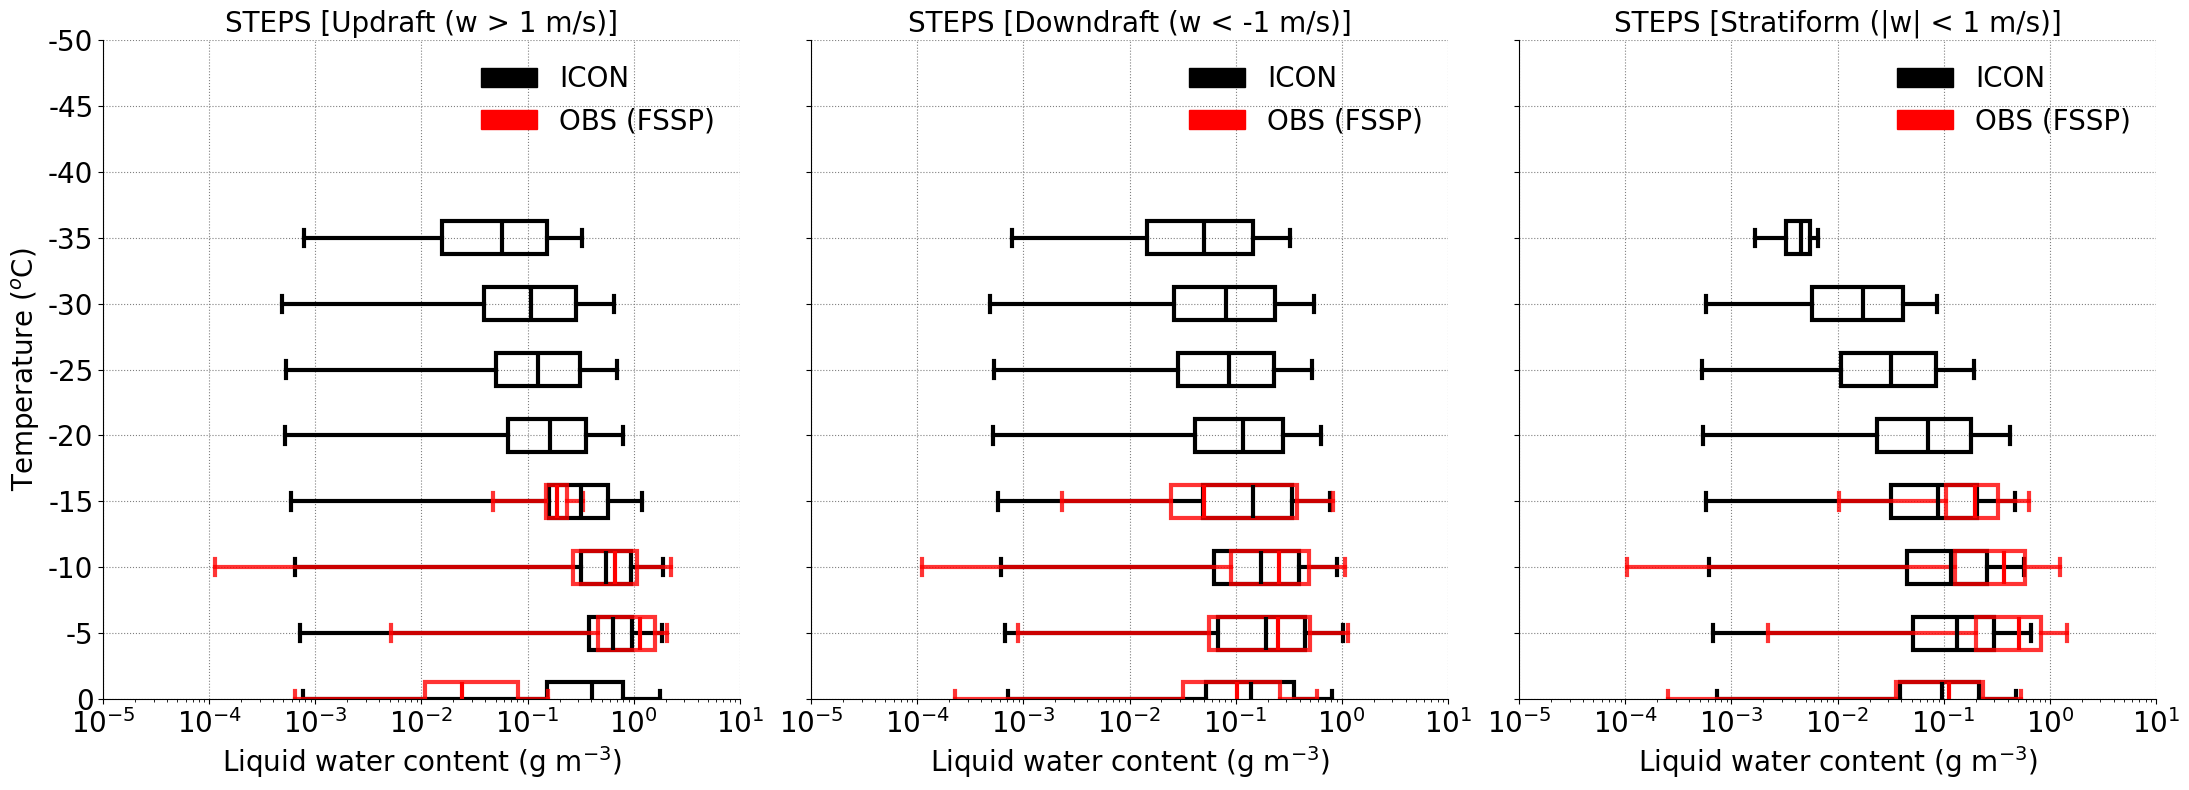

In [65]:

#temp_fssp_bin = np.arange(df_t28_obs['tempc'].min() - 2, df_t28_obs['tempc'].max() + 2, 3)  # Adjust bin range

temp_fssp_bin = np.arange(-50., 20., 5.)
temp_fssp_bin = np.sort(temp_fssp_bin)
df_t28_obs['temp_fssp_bin'] = np.digitize(df_t28_obs['tempc'], bins=temp_fssp_bin, right=False)

bin_edges = np.concatenate([temp_fssp_bin - 2, [temp_fssp_bin[-1] + 2]])  # Adjust to cover the temperature range
df_t28_obs['temp_bin'] = bin_edges[df_t28_obs['temp_fssp_bin']]


### LWC
df_lwc_up_fssp = df_t28_obs[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_fssp = df_t28_obs[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_fssp = df_t28_obs[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_fssp = df_lwc_up_fssp.dropna(subset=['temp_bin'])
df_lwc_dn_fssp = df_lwc_dn_fssp.dropna(subset=['temp_bin'])
df_lwc_st_fssp = df_lwc_st_fssp.dropna(subset=['temp_bin'])

lwc_fssp_up_by_bin = [df_lwc_up_fssp[df_lwc_up_fssp['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_fssp_dn_by_bin = [df_lwc_dn_fssp[df_lwc_dn_fssp['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_fssp_st_by_bin = [df_lwc_st_fssp[df_lwc_st_fssp['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]

#### Total number concentrations
df_tot_conc_up_fssp = df_t28_obs[['tot_conc_up', 'temp_bin']].dropna()
df_tot_conc_dn_fssp = df_t28_obs[['tot_conc_dn', 'temp_bin']].dropna()
df_tot_conc_st_fssp = df_t28_obs[['tot_conc_st', 'temp_bin']].dropna()

df_tot_conc_up_fssp = df_tot_conc_up_fssp.dropna(subset=['temp_bin'])
df_tot_conc_dn_fssp = df_tot_conc_dn_fssp.dropna(subset=['temp_bin'])
df_tot_conc_st_fssp = df_tot_conc_st_fssp.dropna(subset=['temp_bin'])

tot_conc_fssp_up_by_bin = [df_tot_conc_up_fssp[df_tot_conc_up_fssp['temp_bin'] == temp]['tot_conc_up'].values for temp in bin_edges]
tot_conc_fssp_dn_by_bin = [df_tot_conc_dn_fssp[df_tot_conc_dn_fssp['temp_bin'] == temp]['tot_conc_dn'].values for temp in bin_edges]
tot_conc_fssp_st_by_bin = [df_tot_conc_st_fssp[df_tot_conc_st_fssp['temp_bin'] == temp]['tot_conc_st'].values for temp in bin_edges]


fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['STEPS [Updraft (w > 1 m/s)]', 'STEPS [Downdraft (w < -1 m/s)]', 'STEPS [Stratiform (|w| < 1 m/s)]']

fontsize = 20;
linewidth = 3;
width=2.5
alpha1=1.0
alpha2=0.8
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(lwc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(lwc_nosip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(lwc_fssp_up_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(lwc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(lwc_nosip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(lwc_fssp_dn_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
    elif i == 2:
        #ax.plot(lwc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(lwc_nosip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(lwc_fssp_st_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-5, 1.e1)
    ax.set_xticklabels([1.e-5, 1.e-4, 1.e-3, 1.e-2, 1.e-1, 1.e0, 1.e1], fontsize=fontsize)
    ax.set_ylim(0, -50)
    #ax.set_yticklabels([20, 10, 0, -10, -20, -30, -40], fontsize=fontsize)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Liquid water content (g m$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (FSSP)')

    ax.legend(handles=handles + [obs_patch1,obs_patch2], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

#axes[0].set_yticks([20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
#axes[0].set_yticklabels(['20', '15', '10', '5', '0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3038457/1702122324.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-2, 1.e0, 1.e2, 1.e4], fontsize=fontsize)
/tmp/ipykernel_3038457/1702122324.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-2, 1.e0, 1.e2, 1.e4], fontsize=fontsize)
/tmp/ipykernel_3038457/1702122324.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([1.e-2, 1.e0, 1.e2, 1.e4], fontsize=fontsize)


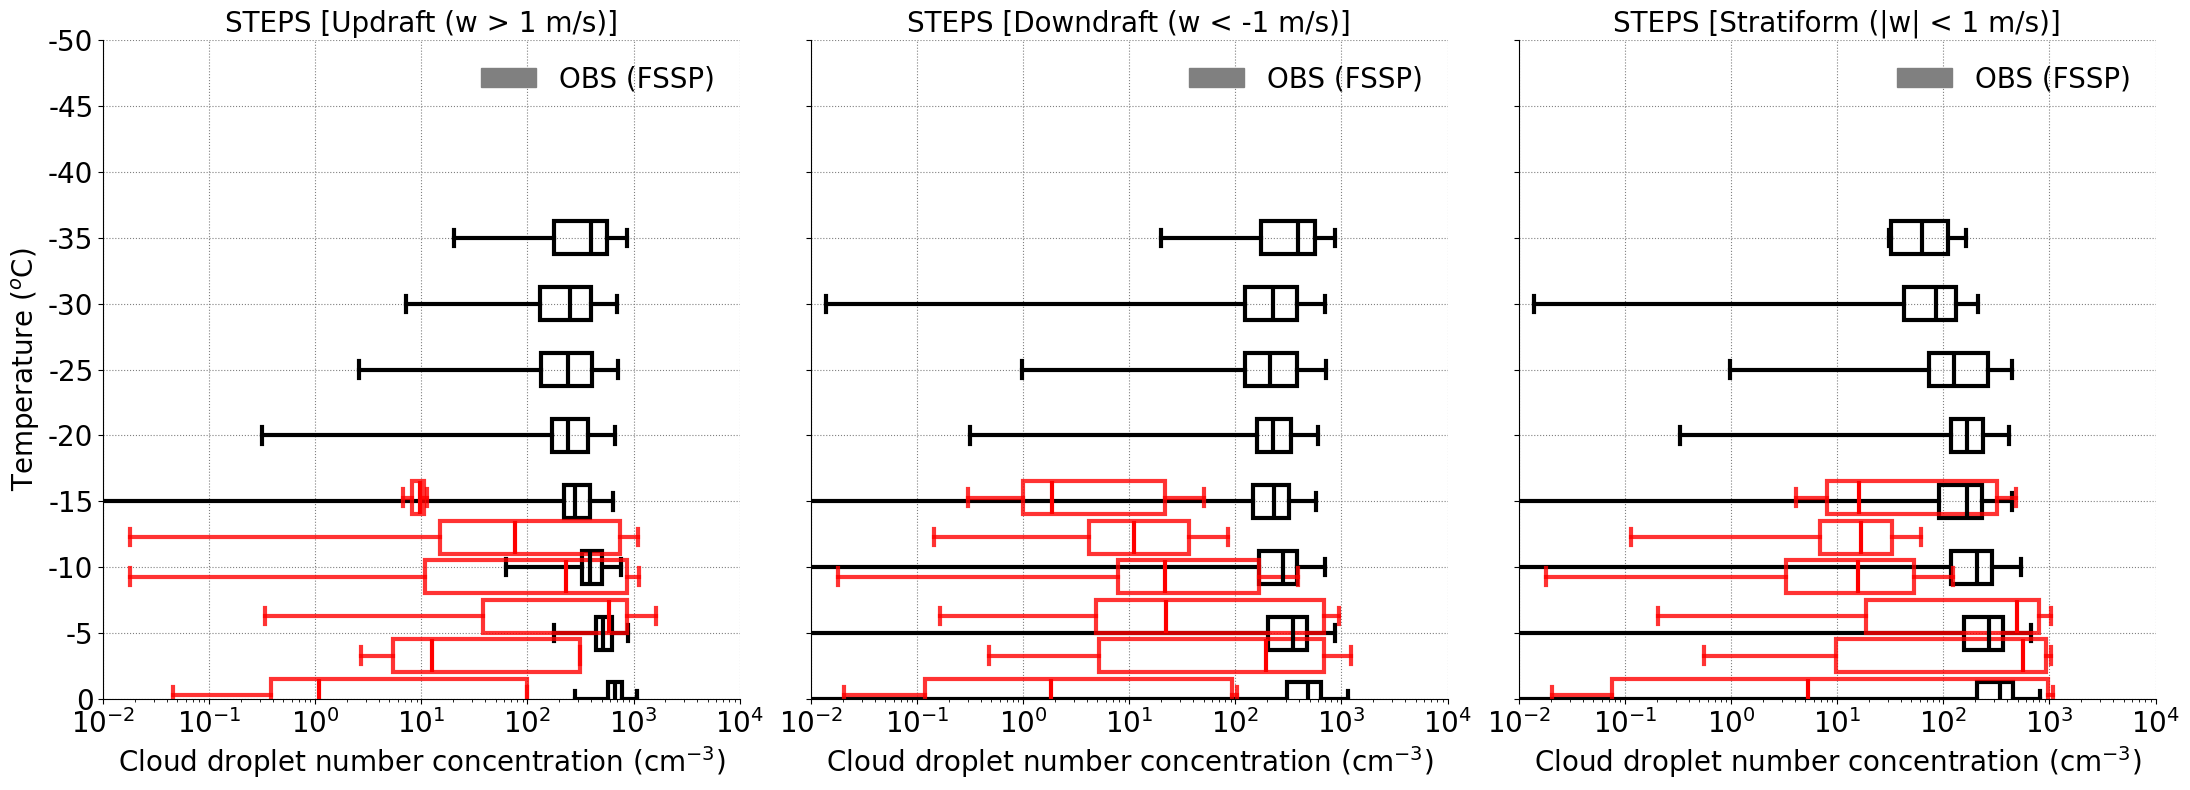

In [66]:


temp_fssp_bin = np.arange(df_t28_obs['tempc'].min() - 2, df_t28_obs['tempc'].max() + 2, 3)  # Adjust bin range

df_t28_obs['temp_fssp_bin'] = np.digitize(df_t28_obs['tempc'], bins=temp_fssp_bin, right=False)

bin_edges = np.concatenate([temp_fssp_bin - 2, [temp_fssp_bin[-1] + 2]])  # Adjust to cover the temperature range
df_t28_obs['temp_bin'] = bin_edges[df_t28_obs['temp_fssp_bin']]


### LWC
df_lwc_up_fssp = df_t28_obs[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_fssp = df_t28_obs[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_fssp = df_t28_obs[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_fssp = df_lwc_up_fssp.dropna(subset=['temp_bin'])
df_lwc_dn_fssp = df_lwc_dn_fssp.dropna(subset=['temp_bin'])
df_lwc_st_fssp = df_lwc_st_fssp.dropna(subset=['temp_bin'])

lwc_fssp_up_by_bin = [df_lwc_up_fssp[df_lwc_up_fssp['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_fssp_dn_by_bin = [df_lwc_dn_fssp[df_lwc_dn_fssp['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_fssp_st_by_bin = [df_lwc_st_fssp[df_lwc_st_fssp['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]

#### Total number concentrations
df_tot_conc_up_fssp = df_t28_obs[['tot_conc_up', 'temp_bin']].dropna()
df_tot_conc_dn_fssp = df_t28_obs[['tot_conc_dn', 'temp_bin']].dropna()
df_tot_conc_st_fssp = df_t28_obs[['tot_conc_st', 'temp_bin']].dropna()

df_tot_conc_up_fssp = df_tot_conc_up_fssp.dropna(subset=['temp_bin'])
df_tot_conc_dn_fssp = df_tot_conc_dn_fssp.dropna(subset=['temp_bin'])
df_tot_conc_st_fssp = df_tot_conc_st_fssp.dropna(subset=['temp_bin'])

tot_conc_fssp_up_by_bin = [df_tot_conc_up_fssp[df_tot_conc_up_fssp['temp_bin'] == temp]['tot_conc_up'].values for temp in bin_edges]
tot_conc_fssp_dn_by_bin = [df_tot_conc_dn_fssp[df_tot_conc_dn_fssp['temp_bin'] == temp]['tot_conc_dn'].values for temp in bin_edges]
tot_conc_fssp_st_by_bin = [df_tot_conc_st_fssp[df_tot_conc_st_fssp['temp_bin'] == temp]['tot_conc_st'].values for temp in bin_edges]


fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['STEPS [Updraft (w > 1 m/s)]', 'STEPS [Downdraft (w < -1 m/s)]', 'STEPS [Stratiform (|w| < 1 m/s)]']

fontsize = 20;
linewidth = 3;
width=2.5
alpha1=1.0
alpha2=0.8
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(cdnc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(cdnc_4sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(tot_conc_fssp_up_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
        
    elif i == 1:
        #ax.plot(cdnc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(cdnc_4sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(tot_conc_fssp_dn_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)
    elif i == 2:
        #ax.plot(cdnc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(cdnc_4sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        ax.boxplot(tot_conc_fssp_st_by_bin[:-1], positions=temp_fssp_bin, vert=False, patch_artist=True,
                   widths=width,
                   boxprops=dict(facecolor='none', edgecolor='red', linewidth=linewidth, alpha=alpha2),  
                   medianprops=dict(color='red', linewidth=linewidth),  
                   whiskerprops=dict(linewidth=linewidth, color='red', alpha=alpha2),  
                   capprops=dict(linewidth=linewidth, color='red', alpha=alpha2),
                   showfliers=False)

    ax.set_xscale('log')
    ax.set_xlim(1.e-2, 1.e4)
    ax.set_xticklabels([1.e-2, 1.e0, 1.e2, 1.e4], fontsize=fontsize)
    ax.set_ylim(0, -50)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Cloud droplet number concentration (cm$^{-3}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (FSSP)')

    ax.legend(handles=handles + [obs_patch], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40', '-45', '-50'], fontsize=fontsize)

#axes[0].set_yticks([20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
#axes[0].set_yticklabels(['20', '15', '10', '5', '0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

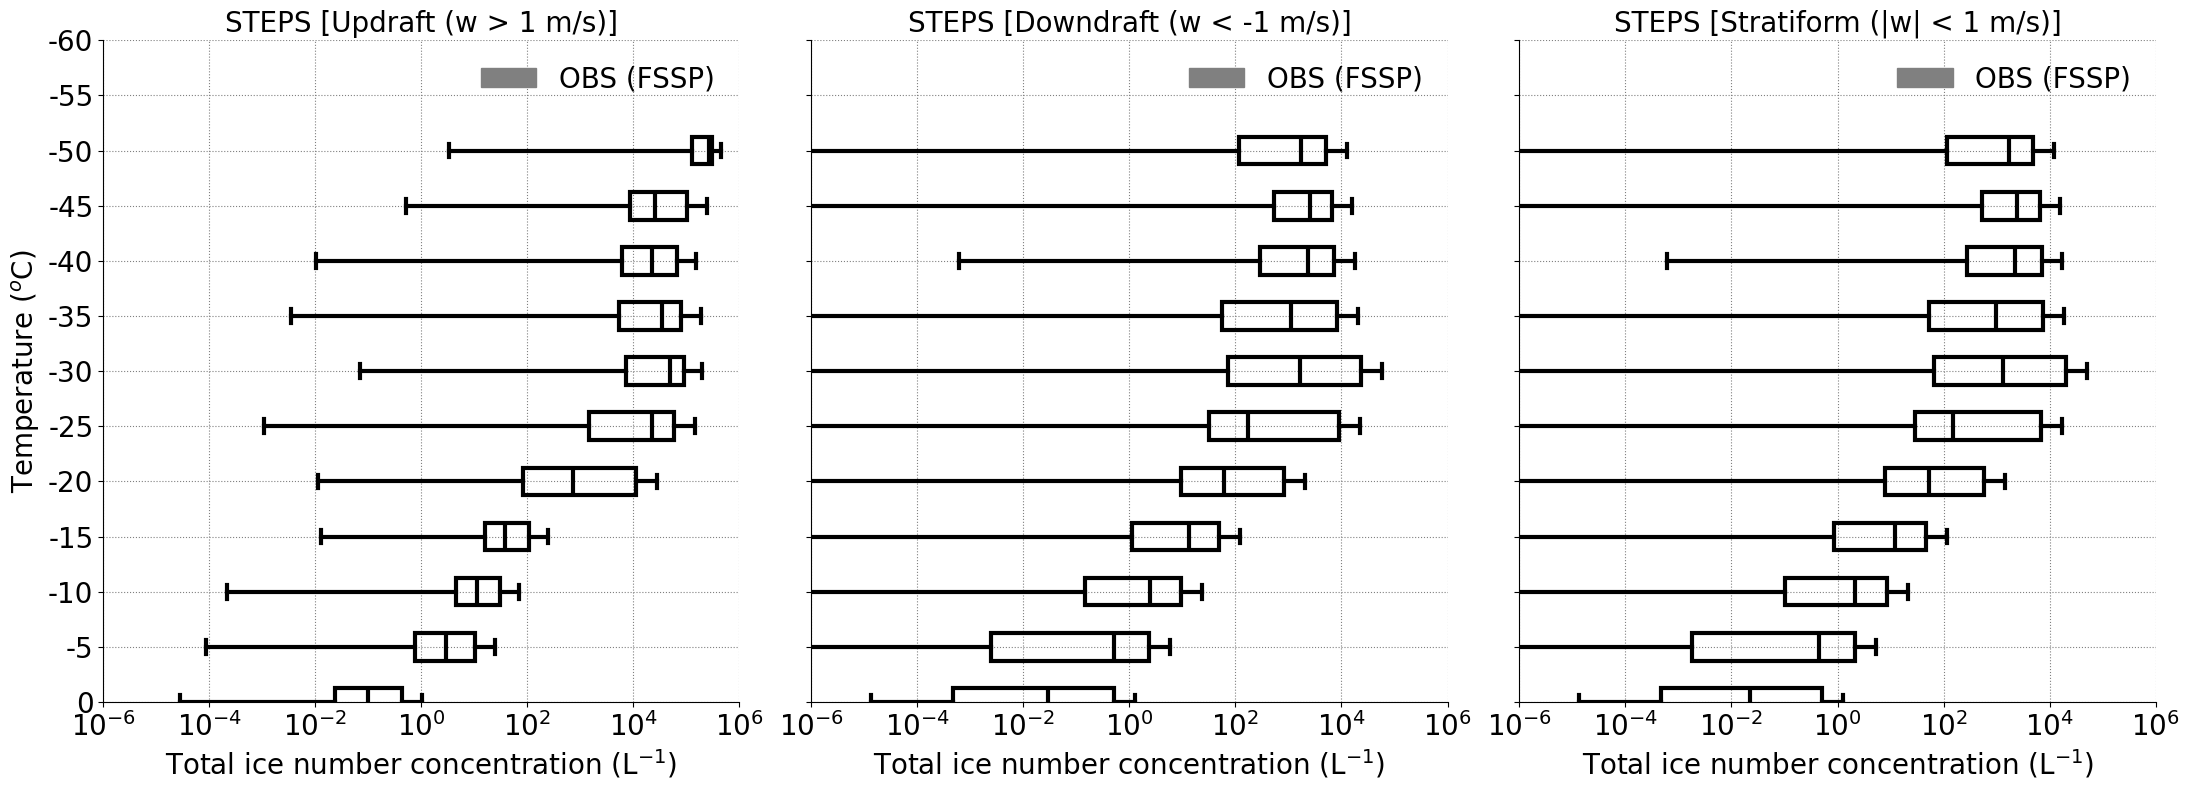

In [80]:


temp_fssp_bin = np.arange(df_t28_obs['tempc'].min() - 2, df_t28_obs['tempc'].max() + 2, 3)  # Adjust bin range

df_t28_obs['temp_fssp_bin'] = np.digitize(df_t28_obs['tempc'], bins=temp_fssp_bin, right=False)

bin_edges = np.concatenate([temp_fssp_bin - 2, [temp_fssp_bin[-1] + 2]])  # Adjust to cover the temperature range
df_t28_obs['temp_bin'] = bin_edges[df_t28_obs['temp_fssp_bin']]


### LWC
df_lwc_up_fssp = df_t28_obs[['lwc_up', 'temp_bin']].dropna()
df_lwc_dn_fssp = df_t28_obs[['lwc_dn', 'temp_bin']].dropna()
df_lwc_st_fssp = df_t28_obs[['lwc_st', 'temp_bin']].dropna()

df_lwc_up_fssp = df_lwc_up_fssp.dropna(subset=['temp_bin'])
df_lwc_dn_fssp = df_lwc_dn_fssp.dropna(subset=['temp_bin'])
df_lwc_st_fssp = df_lwc_st_fssp.dropna(subset=['temp_bin'])

lwc_fssp_up_by_bin = [df_lwc_up_fssp[df_lwc_up_fssp['temp_bin'] == temp]['lwc_up'].values for temp in bin_edges]
lwc_fssp_dn_by_bin = [df_lwc_dn_fssp[df_lwc_dn_fssp['temp_bin'] == temp]['lwc_dn'].values for temp in bin_edges]
lwc_fssp_st_by_bin = [df_lwc_st_fssp[df_lwc_st_fssp['temp_bin'] == temp]['lwc_st'].values for temp in bin_edges]

#### Total number concentrations
df_tot_conc_up_fssp = df_t28_obs[['tot_conc_up', 'temp_bin']].dropna()
df_tot_conc_dn_fssp = df_t28_obs[['tot_conc_dn', 'temp_bin']].dropna()
df_tot_conc_st_fssp = df_t28_obs[['tot_conc_st', 'temp_bin']].dropna()

df_tot_conc_up_fssp = df_tot_conc_up_fssp.dropna(subset=['temp_bin'])
df_tot_conc_dn_fssp = df_tot_conc_dn_fssp.dropna(subset=['temp_bin'])
df_tot_conc_st_fssp = df_tot_conc_st_fssp.dropna(subset=['temp_bin'])

tot_conc_fssp_up_by_bin = [df_tot_conc_up_fssp[df_tot_conc_up_fssp['temp_bin'] == temp]['tot_conc_up'].values for temp in bin_edges]
tot_conc_fssp_dn_by_bin = [df_tot_conc_dn_fssp[df_tot_conc_dn_fssp['temp_bin'] == temp]['tot_conc_dn'].values for temp in bin_edges]
tot_conc_fssp_st_by_bin = [df_tot_conc_st_fssp[df_tot_conc_st_fssp['temp_bin'] == temp]['tot_conc_st'].values for temp in bin_edges]


fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=True)
plot_titles = ['STEPS [Updraft (w > 1 m/s)]', 'STEPS [Downdraft (w < -1 m/s)]', 'STEPS [Stratiform (|w| < 1 m/s)]']

fontsize = 20;
linewidth = 3;
width=2.5
alpha1=1.0
alpha2=0.8
for i, ax in enumerate(axes):
    #temp_bins = temp_bins_list[i]
    #data_by_bin = data_list[i]

    # Plot ICON line if applicable (replace with actual values)
    if i == 0:
        #ax.plot(cdnc_up_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_4sip_up_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        
    elif i == 1:
        #ax.plot(cdnc_dn_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_4sip_dn_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
    elif i == 2:
        #ax.plot(cdnc_st_sip, tempc_sip, 'k-', linewidth=linewidth+2, label='ICON')
        ax.boxplot(inc_4sip_st_by_bin[:-1], positions=tempc_bin, vert=False, patch_artist=True,
            widths=width,
            boxprops=dict(facecolor='none', edgecolor='black', linewidth=linewidth, alpha=alpha1),
            medianprops=dict(color='black', linewidth=linewidth),
            whiskerprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            capprops=dict(linewidth=linewidth, color='black', alpha=alpha1),
            showfliers=False)
        

    ax.set_xscale('log')
    ax.set_xlim(1.e-6, 1.e6)
    #ax.set_xticklabels([1.e-2, 1.e0, 1.e2, 1.e4], fontsize=fontsize)
    ax.set_ylim(0, -50)
    ax.set_title(plot_titles[i], fontsize=fontsize)
    ax.set_xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.grid(True, linestyle=':', color='grey',alpha=1.0)

    # Combine both ICON line and boxplot legend
    handles, labels = ax.get_legend_handles_labels()

    obs_patch1 = mpatches.Patch(color='black', label='ICON')
    obs_patch2 = mpatches.Patch(color='red', label='OBS (FSSP)')

    ax.legend(handles=handles + [obs_patch], frameon=False, loc='best', fontsize=fontsize)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[2].set_xscale('log')
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50, -55, -60])
axes[0].set_yticklabels(['0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40', '-45', '-50', '-55', '-60'], fontsize=fontsize)

#axes[0].set_yticks([20, 15, 10, 5, 0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50])
#axes[0].set_yticklabels(['20', '15', '10', '5', '0', '-5', '-10', '-15', '-20', '-25', '-30', '-35', '-40',  '-45', '-50'], fontsize=fontsize)

plt.tight_layout()
plt.show()

In [18]:

file_path = '/work/bk1415/b382718/output/steps/observations/aircraft_data/raw/yr2000/f756/f756_2dc.raw'

# Attempt to read the raw file as a generic binary file
raw_data = np.fromfile(file_path, dtype=np.uint8)  # or dtype=np.uint16, np.int16, etc.

# Inspect the first few bytes
print(raw_data[:3])

[  0   0 112]


In [12]:
data

array([ 0.,  0.,  0., ...,  0.,  0., nan], dtype=float32)